In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import glob

def clear_previous_features(directory):
    # Eliminar todos los archivos .pkl en el directorio especificado
    files = glob.glob(os.path.join(directory, '*.pkl'))
    for f in files:
        try:
            os.remove(f)
            print(f'Eliminado: {f}')
        except Exception as e:
            print(f'No se pudo eliminar {f}. Error: {str(e)}')

# Directorio donde guardas las características
save_dir = "/content/drive/MyDrive/PANCANCER FINAL"

# Llamada a la función para limpiar los archivos previos
clear_previous_features(save_dir)


In [4]:
import os

# Obtener el número de núcleos
num_cores = os.cpu_count()
print(f"Número de núcleos de CPU: {num_cores}")


Número de núcleos de CPU: 12


In [5]:
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU en uso: {gpu_name}")
    print(f"Memoria total de la GPU: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("No se encontró una GPU disponible.")


GPU en uso: NVIDIA L4
Memoria total de la GPU: 22.17 GB


In [6]:
!pip install umap-learn shap
!pytorch-lamb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
/bin/bash: line 1: pytorch-lamb: command not found


In [7]:
import pandas as pd
clinicos = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/meta_sinFPPP.pkl')
clinicos

Unnamed: 0  \
file_id                                            
9fe7d0f4-866d-490f-b2cb-d9be7da889de        7001   
dd74434f-300f-4798-8342-aad31b192e12        8001   
07db9e9d-059d-4e6c-b483-81517a492b96        1001   
47ee860a-fd18-48f2-bfe7-4e19391950bd        2001   
e322b0e5-458a-4cbf-a64f-9b348e413939        5001   
...                                          ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3999   
673a85f3-ba5e-448a-acee-dfec77b5238e        8000   
3d93b2ae-7730-4914-af23-ff3554752922        9000   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        4000   
a512642f-b720-4efb-a4e9-49b746980809       11000   

                                                           data_type  \
file_id                                                                
9fe7d0f4-866d-490f-b2cb-d9be7da889de  Gene Expression Quantification   
dd74434f-300f-4798-8342-aad31b192e12  Gene Expression Quantification   
07db9e9d-059d-4e6c-b483-81517a492b96  Gene Expression Quantification   
47ee860a-fd18-48f2-bfe7-4e19391950bd  Gene Expression Quantification   
e322b0e5-458a-4cbf-a64f-9b348e413939  Gene Expression Quantification   
...                                                              ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  Gene Expression Quantification   
673a85f3-ba5e-448a-acee-dfec77b5238e  Gene Expression Quantification   
3d93b2ae-7730-4914-af23-ff3554752922  Gene Expression Quantification   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  Gene Expression Quantification   
a512642f-b720-4efb-a4e9-49b746980809  Gene Expression Quantification   

                                                      updated_datetime  \
file_id                                                                  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  2016-05-26T20:51:28.753650-05:00   
dd74434f-300f-4798-8342-aad31b192e12  2016-05-26T21:04:47.187859-05:00   
07db9e9d-059d-4e6c-b483-81517a492b96  2016-05-26T21:04:48.015693-05:00   
47ee860a-fd18-48f2-bfe7-4e19391950bd  2016-05-26T21:04:48.692729-05:00   
e322b0e5-458a-4cbf-a64f-9b348e413939  2016-05-26T21:04:49.266949-05:00   
...                                                                ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  2016-06-01T23:31:30.205560-05:00   
673a85f3-ba5e-448a-acee-dfec77b5238e  2016-06-01T23:31:30.867514-05:00   
3d93b2ae-7730-4914-af23-ff3554752922  2016-06-01T23:31:31.468195-05:00   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  2016-06-01T23:31:32.108278-05:00   
a512642f-b720-4efb-a4e9-49b746980809  2016-06-01T23:31:32.780942-05:00   

                                                                              file_name  \
file_id                                                                                   
9fe7d0f4-866d-490f-b2cb-d9be7da889de  1db2cfc5-346d-4398-9dd4-8b92435059fd.htseq.cou...   
dd74434f-300f-4798-8342-aad31b192e12  5f4cf592-e135-43ff-9c11-bcba462626d3.htseq.cou...   
07db9e9d-059d-4e6c-b483-81517a492b96  aa4a76e4-5348-479c-8beb-3e4e34e18ce9.htseq.cou...   
47ee860a-fd18-48f2-bfe7-4e19391950bd  0c172934-64ff-44dc-bdba-4c738f5692ea.htseq.cou...   
e322b0e5-458a-4cbf-a64f-9b348e413939  3025ad45-1d29-4c05-b90f-3d4a348c82c6.htseq.cou...   
...                                                                                 ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  1ef78255-1b5c-42af-aa81-128c1b009114.htseq.cou...   
673a85f3-ba5e-448a-acee-dfec77b5238e  d07c7238-807f-48b1-bf06-deaa6200f4aa.htseq.cou...   
3d93b2ae-7730-4914-af23-ff3554752922  3c5b65ad-998a-4124-814f-760de89f05d0.htseq.cou...   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  9146cb7b-e388-41b4-aa5f-a9a571abdc40.htseq.cou...   
a512642f-b720-4efb-a4e9-49b746980809  4690efed-5d11-4191-addb-8d290ddc063a.htseq.cou...   

                                                                md5sum  \
file_id                                                                  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  bff9318f04ad067bccc0fbd2d31b45f1   
dd74434f-300f-4798-8342-aad31b192e12  92cf7b5b7f0a0f5df

In [8]:
df = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/df_sinFPPP_2.pkl')
df

0                                     5S_rRNA  5_8S_rRNA   7SK   A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        0          0    79   1055   
dd74434f-300f-4798-8342-aad31b192e12        1          0  1250      8   
07db9e9d-059d-4e6c-b483-81517a492b96        0          0    41      2   
47ee860a-fd18-48f2-bfe7-4e19391950bd        0          0   111  16482   
e322b0e5-458a-4cbf-a64f-9b348e413939        2          0    22      2   
...                                       ...        ...   ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3          0    52     14   
673a85f3-ba5e-448a-acee-dfec77b5238e        3          0   169     40   
3d93b2ae-7730-4914-af23-ff3554752922        0          1  3961     10   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        9          1  1003     90   
a512642f-b720-4efb-a4e9-49b746980809        2          0    98     41   

0                                     A1BG-AS1   A1CF     A2M  A2M-AS1  A2ML1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        12   3291    6614       11      0   
dd74434f-300f-4798-8342-aad31b192e12        51      3   24510       55    120   
07db9e9d-059d-4e6c-b483-81517a492b96        35   1618   21227       29      1   
47ee860a-fd18-48f2-bfe7-4e19391950bd       328  10632  159168      124      1   
e322b0e5-458a-4cbf-a64f-9b348e413939         0      2    7488       18   1714   
...                                        ...    ...     ...      ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        76   2971  111008       92      6   
673a85f3-ba5e-448a-acee-dfec77b5238e       142      4   25243       27    277   
3d93b2ae-7730-4914-af23-ff3554752922        54      3   32550       26    289   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b       272      0     331       96     55   
a512642f-b720-4efb-a4e9-49b746980809       154      1   36537      107     18   

0                                     A2ML1-AS1  ...  ZYG11A  ZYG11AP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de          0  ...       5         0   
dd74434f-300f-4798-8342-aad31b192e12          0  ...      73         0   
07db9e9d-059d-4e6c-b483-81517a492b96          0  ...       5         0   
47ee860a-fd18-48f2-bfe7-4e19391950bd          0  ...      66         0   
e322b0e5-458a-4cbf-a64f-9b348e413939          0  ...      52         0   
...                                         ...  ...     ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004          0  ...      28         0   
673a85f3-ba5e-448a-acee-dfec77b5238e          0  ...     172         0   
3d93b2ae-7730-4914-af23-ff3554752922          1  ...       2         0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b          0  ...      10         0   
a512642f-b720-4efb-a4e9-49b746980809          0  ...     210         0   

0                                     ZYG11B    ZYX  ZYXP1  ZZEF1  ZZZ3  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de     557   3130      0    314   469   
dd74434f-300f-4798-8342-aad31b192e12     963  10619      0   1656  1146   
07db9e9d-059d-4e6c-b483-81517a492b96    2136  13793      0   3667  2641   
47ee860a-fd18-48f2-bfe7-4e19391950bd    3417    887      0   1822  1891   
e322b0e5-458a-4cbf-a64f-9b348e413939    2155  13427      0   1404  2215   
...                                      ...    ...    ...    ...   ...   
62cb41b1-8960-4fa2-8f74-38dd174af004    3969  11102      0   4381  2584   
673a85f3-ba5e-448a-acee-dfec77b5238e    2717  14657      0   1090  2165   
3d93b2ae-7730-4914-af23-ff3554752922    2568   4216      0   3239   908   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b    1611  19604      0   7247  3970   
a512642f-b720-4efb-a4e9-49b746980809    4057   8229      0   5007  3273   

0                                     hsa-mir-1253  hsa-mir-423  snoZ196  
9fe7d0f4-866d-490f-b2cb-d9be7da889de             0            0        3  
dd74434f-300f-4798-8342-aad31b192e12             0            0        3  
07db9e9d-059d-4e6c-b483-81517a492b96             0            0        3  
47ee860a-fd18-48f2-bfe7-4e19391950bd             0          

In [9]:
clinicos = clinicos.dropna(subset=['vital'])
clinicos = clinicos.dropna(subset=['panel'])

In [10]:
df['vital'] = clinicos['vital']
df['panel'] = clinicos['panel']

In [11]:
df = df.dropna(subset=['vital'])
df = df.dropna(subset=['panel'])

In [12]:
clinicos['panel'].unique()

array(['LIHC', 'PRAD', 'READ', 'BLCA', 'LGG', 'BRCA', 'UCEC', 'SARC',
       'KIRC', 'PCPG', 'DLBC', 'MESO', 'THYM', 'LUSC', 'LUAD', 'STAD',
       'GBM', 'LAML', 'THCA', 'CESC', 'COAD', 'HNSC', 'UVM', 'SKCM',
       'PAAD', 'OV', 'TGCT', 'KICH', 'ESCA', 'KIRP', 'ACC', 'CHOL', 'UCS'],
      dtype=object)

In [13]:
df

0                                     5S_rRNA  5_8S_rRNA   7SK   A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        0          0    79   1055   
dd74434f-300f-4798-8342-aad31b192e12        1          0  1250      8   
07db9e9d-059d-4e6c-b483-81517a492b96        0          0    41      2   
47ee860a-fd18-48f2-bfe7-4e19391950bd        0          0   111  16482   
e322b0e5-458a-4cbf-a64f-9b348e413939        2          0    22      2   
...                                       ...        ...   ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3          0    52     14   
673a85f3-ba5e-448a-acee-dfec77b5238e        3          0   169     40   
3d93b2ae-7730-4914-af23-ff3554752922        0          1  3961     10   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        9          1  1003     90   
a512642f-b720-4efb-a4e9-49b746980809        2          0    98     41   

0                                     A1BG-AS1   A1CF     A2M  A2M-AS1  A2ML1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        12   3291    6614       11      0   
dd74434f-300f-4798-8342-aad31b192e12        51      3   24510       55    120   
07db9e9d-059d-4e6c-b483-81517a492b96        35   1618   21227       29      1   
47ee860a-fd18-48f2-bfe7-4e19391950bd       328  10632  159168      124      1   
e322b0e5-458a-4cbf-a64f-9b348e413939         0      2    7488       18   1714   
...                                        ...    ...     ...      ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        76   2971  111008       92      6   
673a85f3-ba5e-448a-acee-dfec77b5238e       142      4   25243       27    277   
3d93b2ae-7730-4914-af23-ff3554752922        54      3   32550       26    289   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b       272      0     331       96     55   
a512642f-b720-4efb-a4e9-49b746980809       154      1   36537      107     18   

0                                     A2ML1-AS1  ...  ZYG11B    ZYX  ZYXP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de          0  ...     557   3130      0   
dd74434f-300f-4798-8342-aad31b192e12          0  ...     963  10619      0   
07db9e9d-059d-4e6c-b483-81517a492b96          0  ...    2136  13793      0   
47ee860a-fd18-48f2-bfe7-4e19391950bd          0  ...    3417    887      0   
e322b0e5-458a-4cbf-a64f-9b348e413939          0  ...    2155  13427      0   
...                                         ...  ...     ...    ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004          0  ...    3969  11102      0   
673a85f3-ba5e-448a-acee-dfec77b5238e          0  ...    2717  14657      0   
3d93b2ae-7730-4914-af23-ff3554752922          1  ...    2568   4216      0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b          0  ...    1611  19604      0   
a512642f-b720-4efb-a4e9-49b746980809          0  ...    4057   8229      0   

0                                     ZZEF1  ZZZ3  hsa-mir-1253  hsa-mir-423  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de    314   469             0            0   
dd74434f-300f-4798-8342-aad31b192e12   1656  1146             0            0   
07db9e9d-059d-4e6c-b483-81517a492b96   3667  2641             0            0   
47ee860a-fd18-48f2-bfe7-4e19391950bd   1822  1891             0            0   
e322b0e5-458a-4cbf-a64f-9b348e413939   1404  2215             0            0   
...                                     ...   ...           ...          ...   
62cb41b1-8960-4fa2-8f74-38dd174af004   4381  2584             0            0   
673a85f3-ba5e-448a-acee-dfec77b5238e   1090  2165             0            0   
3d93b2ae-7730-4914-af23-ff3554752922   3239   908             0            0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b   7247  3970             0            0   
a512642f-b720-4efb-a4e9-49b746980809   5007  3273             0            0   

0                                     snoZ196  vital  panel  
9fe7d0f4-866d-490f-b2cb-d9be7da889de        3  Alive   LIHC  
dd74434f-300f-4798-8342-aad31b192e12        3  Alive   PRAD  
07db9e9d-059d-4e6c-b483-81517a492b96        3   Dead   READ  
47ee

Usando dispositivo: cuda
Epoch [1/100], Train Loss Label: 0.9058, Train Loss Domain: 1.6217, Train Total Loss: 2.5276
Validation Loss Label: 0.5682, Validation Loss Domain: 1.4789, Validation Total Loss: 2.0471
Train Label Accuracy: 0.6633, Train Domain Accuracy: 0.5859
Validation Label Accuracy: 0.6890, Validation Domain Accuracy: 0.5914
Epoch [2/100], Train Loss Label: 0.6032, Train Loss Domain: 1.6676, Train Total Loss: 2.2709
Validation Loss Label: 0.6170, Validation Loss Domain: 1.8054, Validation Total Loss: 2.4224
Train Label Accuracy: 0.6862, Train Domain Accuracy: 0.5489
Validation Label Accuracy: 0.6861, Validation Domain Accuracy: 0.5384
Epoch [3/100], Train Loss Label: 0.5845, Train Loss Domain: 1.4669, Train Total Loss: 2.0513
Validation Loss Label: 0.5819, Validation Loss Domain: 1.2578, Validation Total Loss: 1.8397
Train Label Accuracy: 0.6969, Train Domain Accuracy: 0.5846
Validation Label Accuracy: 0.6871, Validation Domain Accuracy: 0.6302
Epoch [4/100], Train Loss L

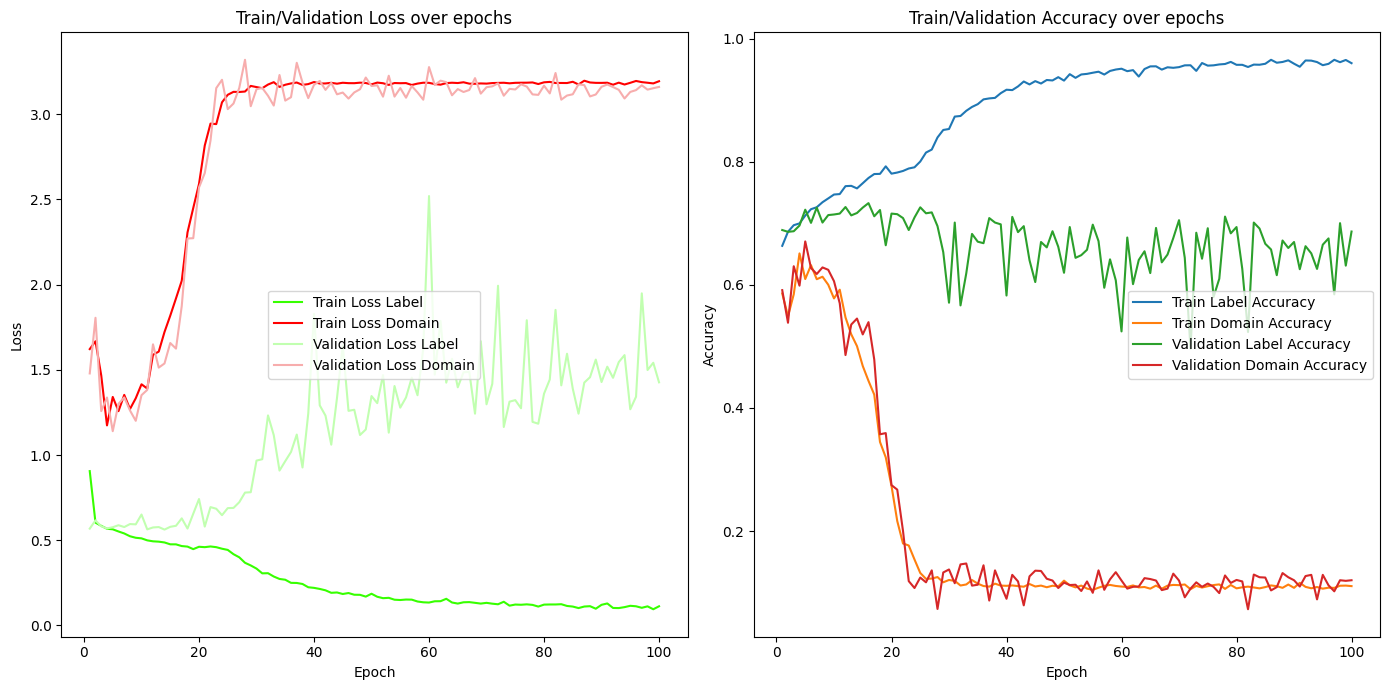

In [53]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from torchsummary import summary  # Para imprimir el resumen del modelo

# Configurar el dispositivo para GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
original_indices = df.index.values  # Guardar los índices originales

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y validación (20%) de forma estratificada
X_train, X_val, Y_train, Y_val, panels_train, panels_val, indices_train, indices_val = train_test_split(
    X, Y, panels, original_indices, test_size=0.2, stratify=Y, random_state=42
)

# Convertir el estado vital y las etiquetas de dominio a valores numéricos
label_encoder_vital = LabelEncoder()
Y_train = label_encoder_vital.fit_transform(Y_train)
Y_val = label_encoder_vital.transform(Y_val)

label_encoder_panel = LabelEncoder()
panels_train = label_encoder_panel.fit_transform(panels_train)
panels_val = label_encoder_panel.transform(panels_val)

# Convertir los datos a tensores y moverlos al dispositivo
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
panels_train_tensor = torch.tensor(panels_train, dtype=torch.long).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32).unsqueeze(1).to(device)
panels_val_tensor = torch.tensor(panels_val, dtype=torch.long).to(device)

# Crear datasets y dataloaders
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor, panels_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor, panels_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Definición del modelo DANN mejorado (igual al anterior)
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.dropout1 = nn.Dropout(0.1)

        # Inicialización de He
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')

    def forward(self, x, lambda_=1.0):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        return x

class LabelPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LabelPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(1000, 1000)
        self.bn2 = nn.BatchNorm1d(1000)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(1000, 1)

        # Inicialización de He
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

class DomainClassifier(nn.Module):
    def __init__(self, input_dim, num_domains):
        super(DomainClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(1000, 1000)
        self.bn2 = nn.BatchNorm1d(1000)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(1000, num_domains)

        # Inicialización de He
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

class DANN(nn.Module):
    def __init__(self, feature_dim, num_domains):
        super(DANN, self).__init__()
        self.feature_extractor = FeatureExtractor(feature_dim)
        self.label_predictor = LabelPredictor(1000)
        self.domain_classifier = DomainClassifier(1000, num_domains)

    def forward(self, x, lambda_=1.0):
        features = self.feature_extractor(x)
        reverse_features = ReverseLayerF.apply(features, lambda_)
        label_output = self.label_predictor(features)
        domain_output = self.domain_classifier(reverse_features)
        return label_output, domain_output, features

class ReverseLayerF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.lambda_, None

# Parámetro tunable: lambda
lambda_ = 1

# Definir las funciones de pérdida
criterion_label = nn.BCELoss().to(device)
criterion_domain = nn.CrossEntropyLoss().to(device)

# Crear el modelo
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
model = DANN(input_dim, num_domains).to(device)

# Definir el optimizador AdamW
optimizer = optim.AdamW(
    model.parameters(),
    lr=0.01,  # Tasa de aprendizaje
    betas=(0.9, 0.99),  # Coeficientes beta
    eps=1e-8,  # Valor pequeño para estabilidad numérica
    weight_decay=0.01,  # Regularización L2
    amsgrad=False  # Si deseas usar la variante AMSGrad
)

# Inicializar listas para guardar pérdidas y accuracies
losses_label_train, losses_domain_train, losses_total_train = [], [], []
accuracies_label_train, accuracies_domain_train = [], []

losses_label_val, losses_domain_val, losses_total_val = [], [], []
accuracies_label_val, accuracies_domain_val = [], []

# Función para evaluar en el conjunto de validación
def evaluate_model(model, loader):
    model.eval()
    running_loss_label = 0.0
    running_loss_domain = 0.0
    correct_label = 0
    correct_domain = 0
    total = 0

    with torch.no_grad():
        for inputs, labels, domains in loader:
            inputs, labels, domains = inputs.to(device), labels.to(device), domains.to(device)

            label_preds, domain_preds, _ = model(inputs, lambda_)

            loss_label = criterion_label(label_preds, labels)
            loss_domain = criterion_domain(domain_preds, domains)

            running_loss_label += loss_label.item()
            running_loss_domain += loss_domain.item()

            predicted_label = (label_preds > 0.5).float()
            correct_label += (predicted_label == labels).sum().item()

            _, predicted_domain = torch.max(domain_preds, 1)
            correct_domain += (predicted_domain == domains).sum().item()

            total += labels.size(0)

    return running_loss_label / len(loader), running_loss_domain / len(loader), correct_label / total, correct_domain / total

# Entrenamiento
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss_label_train = 0.0
    running_loss_domain_train = 0.0
    correct_label_train = 0
    correct_domain_train = 0
    total_train = 0

    for i, (inputs, labels, domains) in enumerate(train_loader):
        inputs, labels, domains = inputs.to(device), labels.to(device), domains.to(device)

        # Forward pass
        label_preds, domain_preds, features = model(inputs, lambda_)

        # Cálculo de pérdidas
        loss_label = criterion_label(label_preds, labels)
        loss_domain = criterion_domain(domain_preds, domains)
        total_loss = loss_label + loss_domain

        # Reseteo de gradientes
        optimizer.zero_grad()

        # Backpropagation
        total_loss.backward()

        # Actualización de los parámetros del modelo
        optimizer.step()

        # Acumulación de pérdidas
        running_loss_label_train += loss_label.item()
        running_loss_domain_train += loss_domain.item()

        # Calcular accuracies
        predicted_label = (label_preds > 0.5).float()
        correct_label_train += (predicted_label == labels).sum().item()

        _, predicted_domain = torch.max(domain_preds, 1)
        correct_domain_train += (predicted_domain == domains).sum().item()

        total_train += labels.size(0)

    # Guardar métricas de entrenamiento
    losses_label_train.append(running_loss_label_train / len(train_loader))
    losses_domain_train.append(running_loss_domain_train / len(train_loader))
    losses_total_train.append((running_loss_label_train + running_loss_domain_train) / len(train_loader))
    accuracies_label_train.append(correct_label_train / total_train)
    accuracies_domain_train.append(correct_domain_train / total_train)

    # Evaluar en validación
    loss_label_val, loss_domain_val, accuracy_label_val, accuracy_domain_val = evaluate_model(model, val_loader)
    losses_label_val.append(loss_label_val)
    losses_domain_val.append(loss_domain_val)
    losses_total_val.append(loss_label_val + loss_domain_val)
    accuracies_label_val.append(accuracy_label_val)
    accuracies_domain_val.append(accuracy_domain_val)

    # Imprimir métricas por época
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss Label: {losses_label_train[-1]:.4f}, Train Loss Domain: {losses_domain_train[-1]:.4f}, Train Total Loss: {losses_total_train[-1]:.4f}')
    print(f'Validation Loss Label: {losses_label_val[-1]:.4f}, Validation Loss Domain: {losses_domain_val[-1]:.4f}, Validation Total Loss: {losses_total_val[-1]:.4f}')
    print(f'Train Label Accuracy: {accuracies_label_train[-1]:.4f}, Train Domain Accuracy: {accuracies_domain_train[-1]:.4f}')
    print(f'Validation Label Accuracy: {accuracies_label_val[-1]:.4f}, Validation Domain Accuracy: {accuracies_domain_val[-1]:.4f}')

# Graficar las métricas
plt.figure(figsize=(14, 7))

# Pérdidas
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), losses_label_train, label='Train Loss Label',color='#37ff00')
plt.plot(range(1, num_epochs+1), losses_domain_train, label='Train Loss Domain', color= '#ff0000')
#plt.plot(range(1, num_epochs+1), losses_total_train, label='Train Total Loss')
plt.plot(range(1, num_epochs+1), losses_label_val, label='Validation Loss Label',color='#c1ffb0')
plt.plot(range(1, num_epochs+1), losses_domain_val, label='Validation Loss Domain', color = '#f7adad')
#plt.plot(range(1, num_epochs+1), losses_total_val, label='Validation Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train/Validation Loss over epochs')
plt.legend()

# Accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), accuracies_label_train, label='Train Label Accuracy')
plt.plot(range(1, num_epochs+1), accuracies_domain_train, label='Train Domain Accuracy')
plt.plot(range(1, num_epochs+1), accuracies_label_val, label='Validation Label Accuracy')
plt.plot(range(1, num_epochs+1), accuracies_domain_val, label='Validation Domain Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train/Validation Accuracy over epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [60]:
# Función para cargar el modelo desde una época específica
def load_model(epoch, model, optimizer, path="/content/drive/MyDrive/DANN_saved_models"):
    checkpoint = torch.load(os.path.join(path, f'model_epoch_{epoch}.pth'))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    return model, optimizer

# Cargar el modelo desde una época específica
epoch_to_load = 99  # Especifica la época que quieres cargar
model, optimizer = load_model(epoch_to_load, model, optimizer)

# Visualización UMAP para la capa de interés en la época cargada
df_umap = generate_umap_with_dataframe_full(model, train_loader, indices_train, 'feature_extractor', 'fc1')

# Verificar el tamaño del DataFrame
print(f"DataFrame UMAP size: {df_umap.shape}")
print(df_umap.head())

# Visualizar UMAP
plot_umap(df_umap, title_suffix=f'for layer fc1 in FeatureExtractor at epoch {epoch_to_load}')


<ipython-input-60-eee59b7310cd>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(os.path.join(path, f'model_epoch_{epoch}.pth'))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DANN_saved_models/model_epoch_99.pth'

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]      39,980,000
       BatchNorm1d-2                 [-1, 1000]           2,000
           Dropout-3                 [-1, 1000]               0
  FeatureExtractor-4                 [-1, 1000]               0
            Linear-5                 [-1, 1000]       1,001,000
       BatchNorm1d-6                 [-1, 1000]           2,000
           Dropout-7                 [-1, 1000]               0
            Linear-8                 [-1, 1000]       1,001,000
       BatchNorm1d-9                 [-1, 1000]           2,000
          Dropout-10                 [-1, 1000]               0
           Linear-11                    [-1, 1]           1,001
   LabelPredictor-12                    [-1, 1]               0
           Linear-13                 [-1, 1000]       1,001,000
      BatchNorm1d-14                 [-

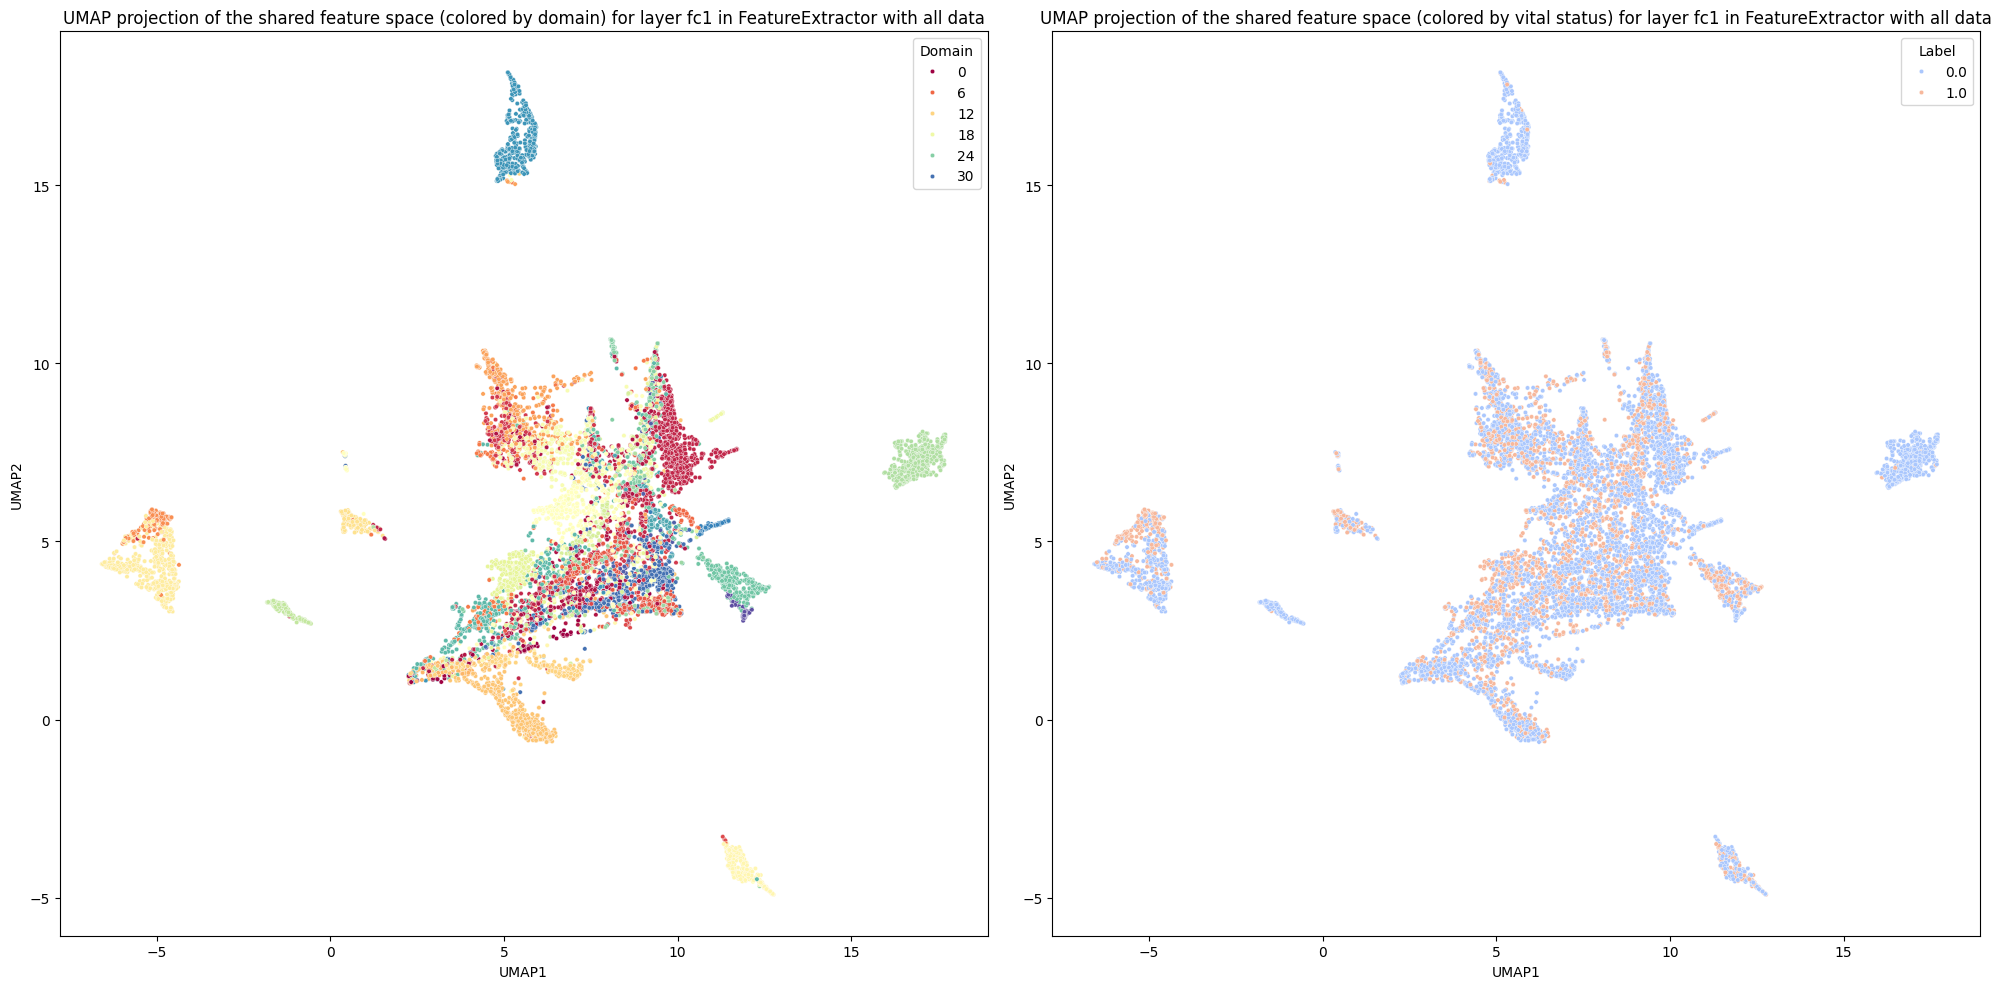

In [55]:
# Usar la matriz completa sin hacer el split
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
indices = df.index.values  # Guardar los índices originales de toda la matriz

# Convertir el estado vital y las etiquetas del panel a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

label_encoder_panel = LabelEncoder()
panels = label_encoder_panel.fit_transform(panels)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

# Crear dataset y dataloader para la matriz completa
dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
loader = DataLoader(dataset, batch_size=128, shuffle=False)

# Parámetros del modelo
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
num_epochs = 30

# Crear el modelo
model = DANN(input_dim, num_domains).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Entrenamiento y visualización de UMAP
epoch = 30  # Especificar la época
iteration = len(loader) - 1  # Usar la última iteración de esa época

# Extraer características de todos los puntos en la capa de interés
df_umap = generate_umap_with_dataframe_full(model, loader, indices, 'feature_extractor', 'fc1')

# Verificar el tamaño del DataFrame
print(f"DataFrame UMAP size: {df_umap.shape}")
print(df_umap.head())

# Visualizar UMAP con todos los puntos
plot_umap(df_umap, title_suffix=f'for layer fc1 in FeatureExtractor with all data')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]      39,980,000
       BatchNorm1d-2                 [-1, 1000]           2,000
           Dropout-3                 [-1, 1000]               0
  FeatureExtractor-4                 [-1, 1000]               0
            Linear-5                 [-1, 1000]       1,001,000
       BatchNorm1d-6                 [-1, 1000]           2,000
           Dropout-7                 [-1, 1000]               0
            Linear-8                 [-1, 1000]       1,001,000
       BatchNorm1d-9                 [-1, 1000]           2,000
          Dropout-10                 [-1, 1000]               0
           Linear-11                    [-1, 1]           1,001
   LabelPredictor-12                    [-1, 1]               0
           Linear-13                 [-1, 1000]       1,001,000
      BatchNorm1d-14                 [-

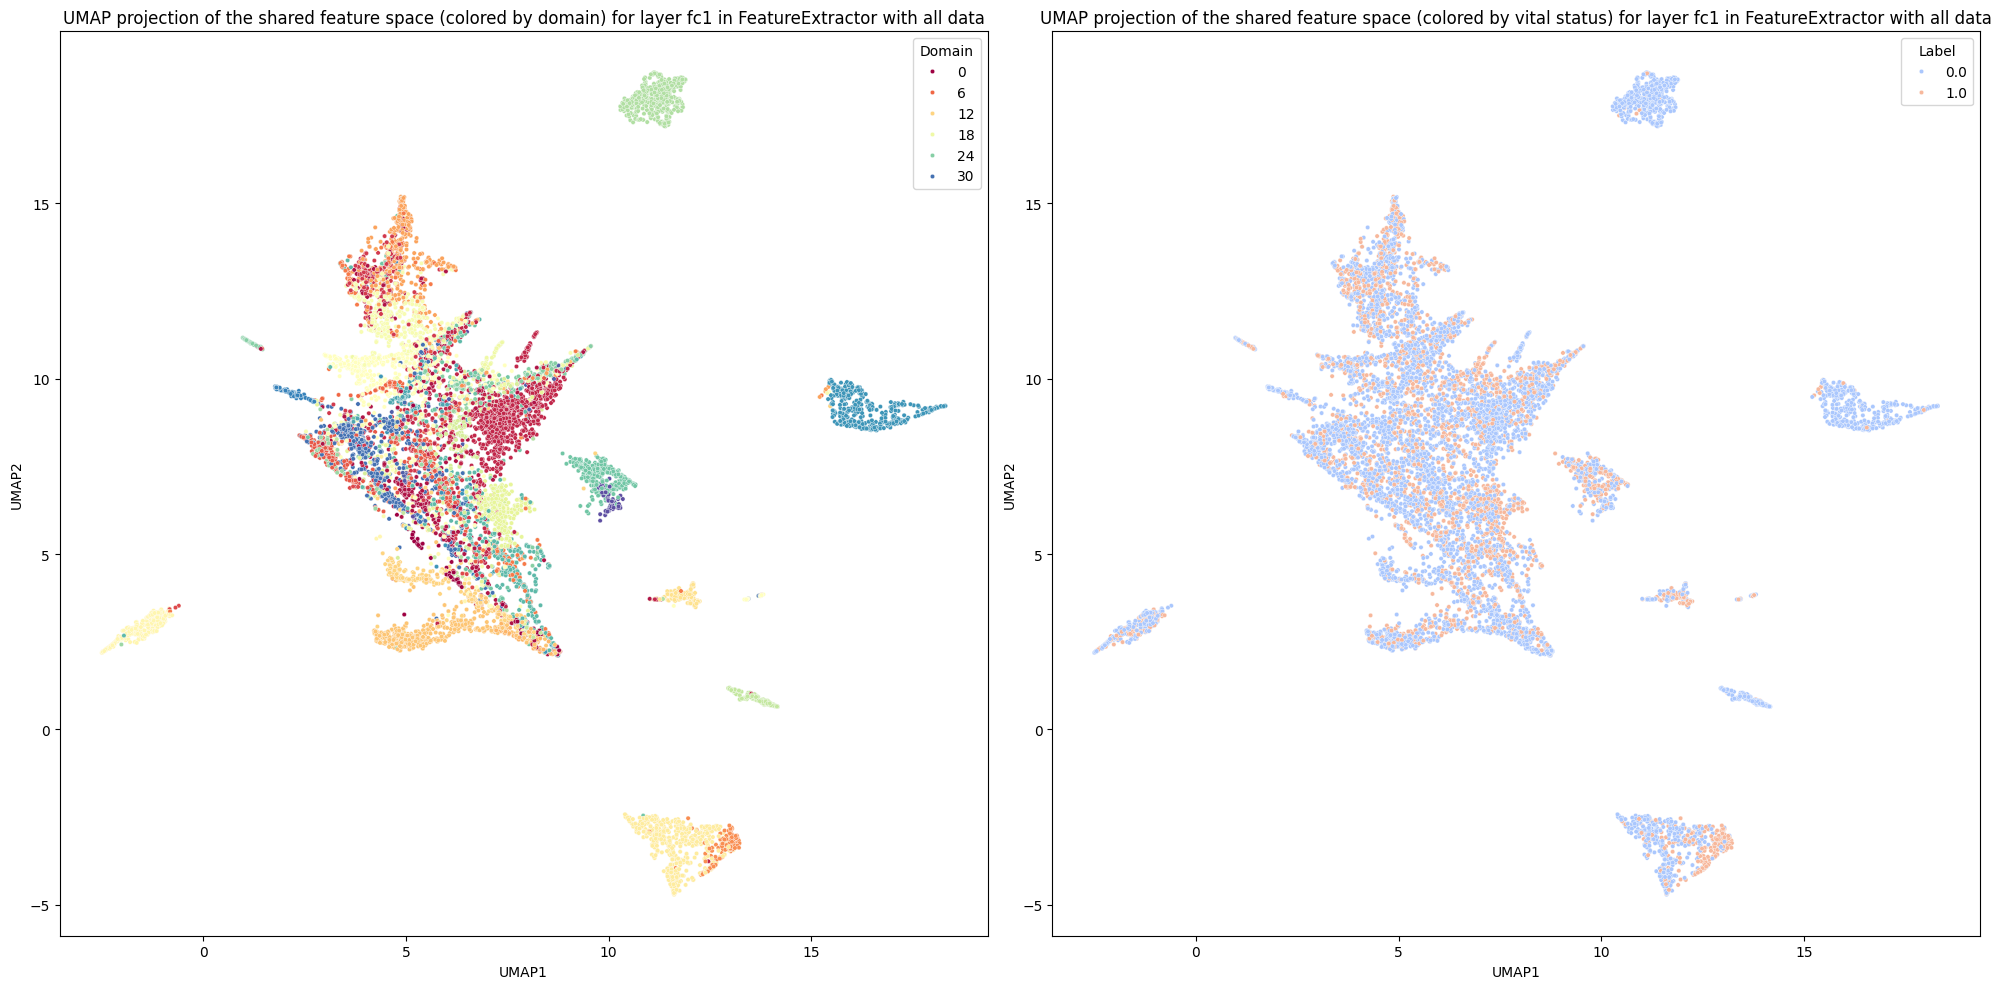

In [59]:
# Usar la matriz completa sin hacer el split
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
indices = df.index.values  # Guardar los índices originales de toda la matriz

# Convertir el estado vital y las etiquetas del panel a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

label_encoder_panel = LabelEncoder()
panels = label_encoder_panel.fit_transform(panels)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

# Crear dataset y dataloader para la matriz completa
dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
loader = DataLoader(dataset, batch_size=128, shuffle=False)

# Parámetros del modelo
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
num_epochs = 99

# Crear el modelo
model = DANN(input_dim, num_domains).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Entrenamiento y visualización de UMAP
epoch = 99  # Especificar la época
iteration = len(loader) - 1  # Usar la última iteración de esa época

# Extraer características de todos los puntos en la capa de interés
df_umap = generate_umap_with_dataframe_full(model, loader, indices, 'feature_extractor', 'fc3')

# Verificar el tamaño del DataFrame
print(f"DataFrame UMAP size: {df_umap.shape}")
print(df_umap.head())

# Visualizar UMAP con todos los puntos
plot_umap(df_umap, title_suffix=f'for layer fc1 in FeatureExtractor with all data')


In [ ]:
# Usar la matriz completa sin hacer el split
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
indices = df.index.values  # Guardar los índices originales de toda la matriz

# Convertir el estado vital y las etiquetas del panel a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

label_encoder_panel = LabelEncoder()
panels = label_encoder_panel.fit_transform(panels)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

# Crear dataset y dataloader para la matriz completa
dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
loader = DataLoader(dataset, batch_size=128, shuffle=False)

# Parámetros del modelo
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
num_epochs = 50

# Crear el modelo
model = DANN(input_dim, num_domains).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Entrenamiento y visualización de UMAP
epoch = 1  # Especificar la época
iteration = len(loader) - 1  # Usar la última iteración de esa época

# Extraer características de todos los puntos en la capa de interés
df_umap = generate_umap_with_dataframe_full(model, loader, indices, 'feature_extractor', 'fc1')

# Verificar el tamaño del DataFrame
print(f"DataFrame UMAP size: {df_umap.shape}")
print(df_umap.head())

# Visualizar UMAP con todos los puntos
plot_umap(df_umap, title_suffix=f'for layer fc1 in FeatureExtractor with all data')


In [34]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


TypeError: plot_umap() takes from 1 to 2 positional arguments but 5 were given

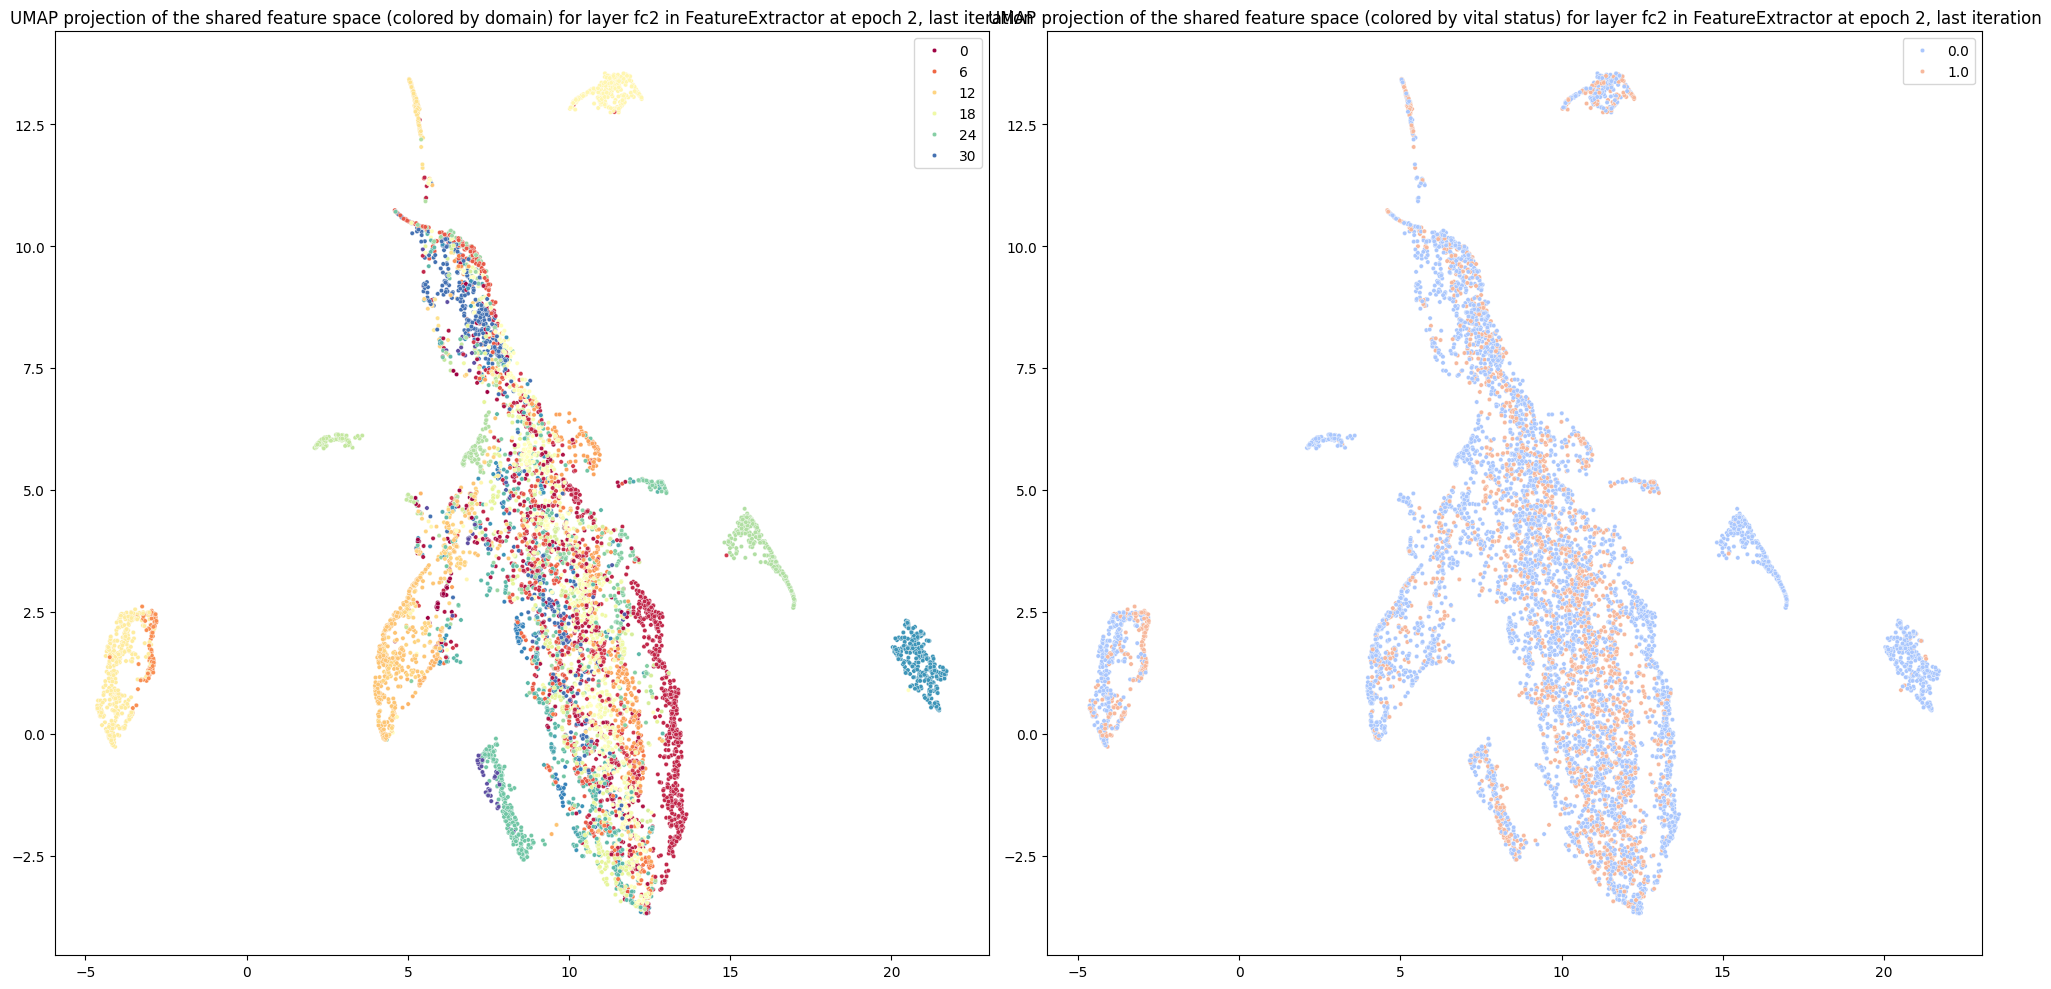

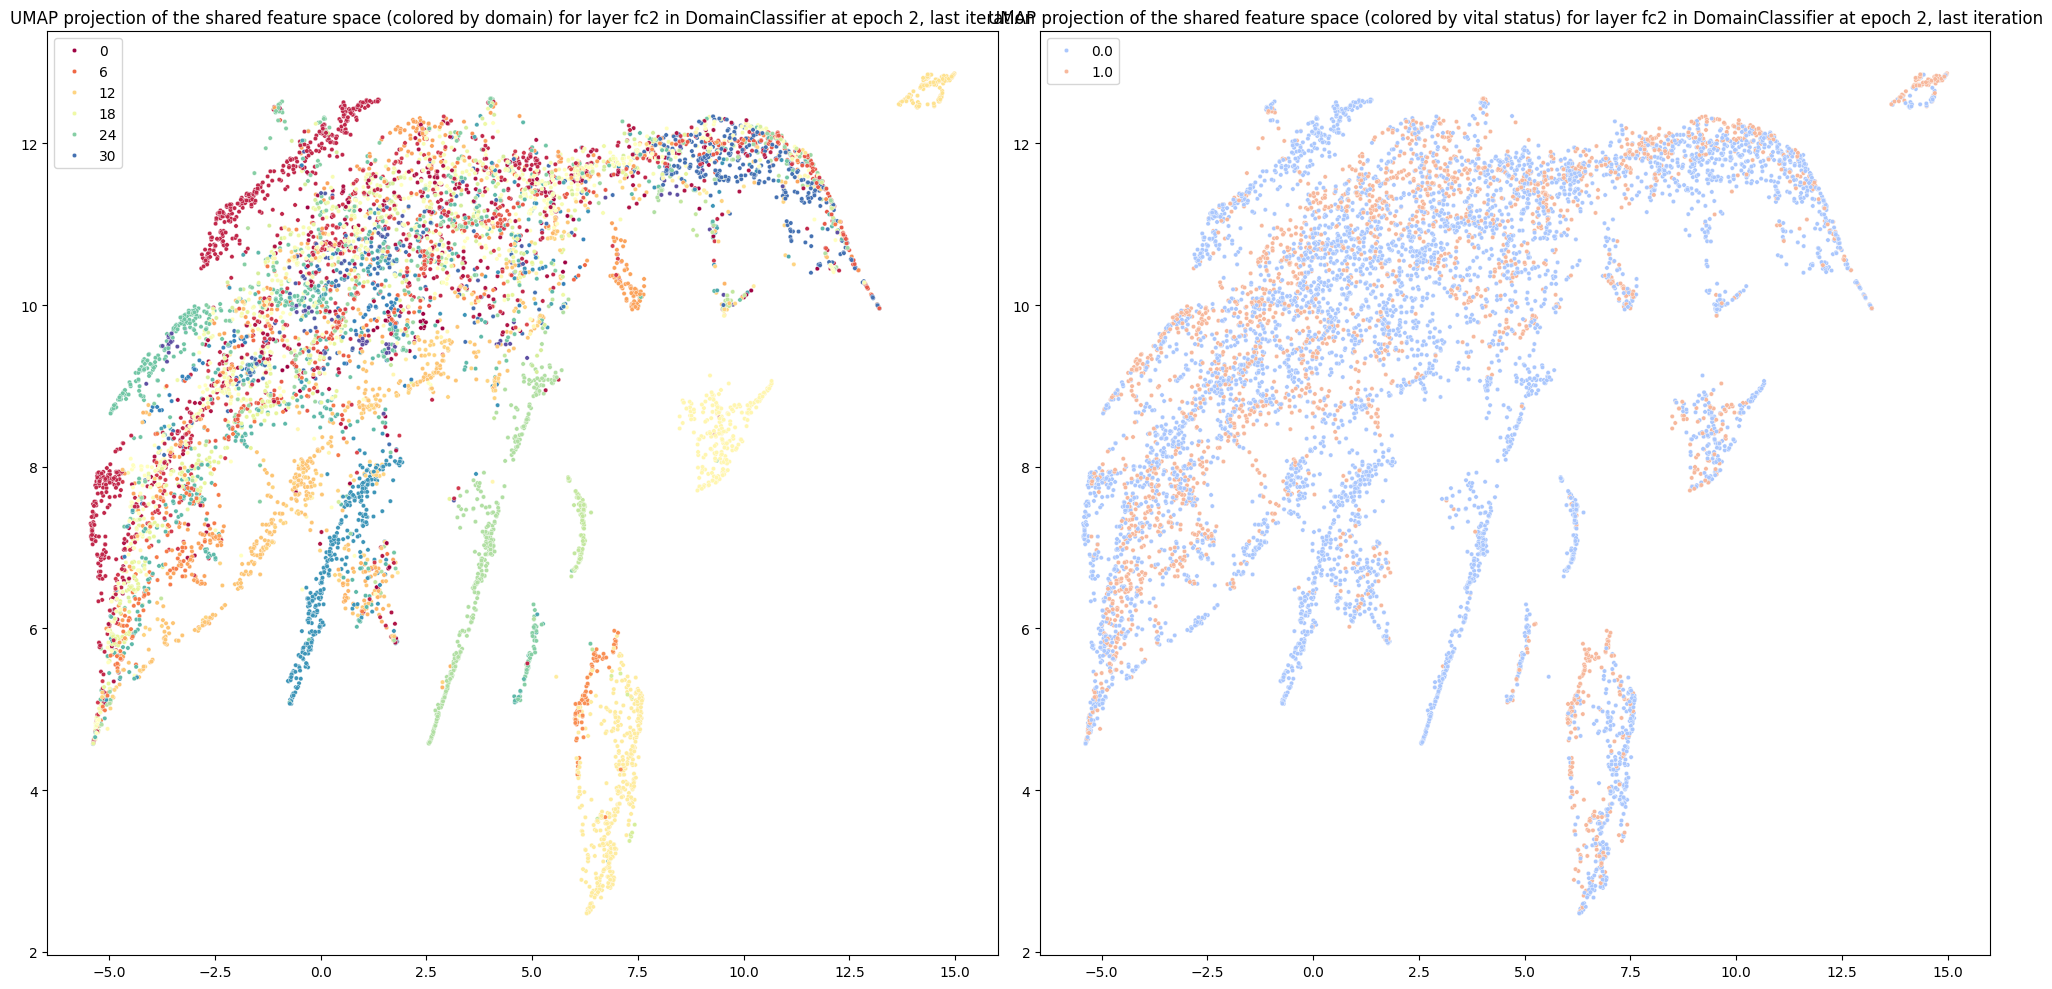

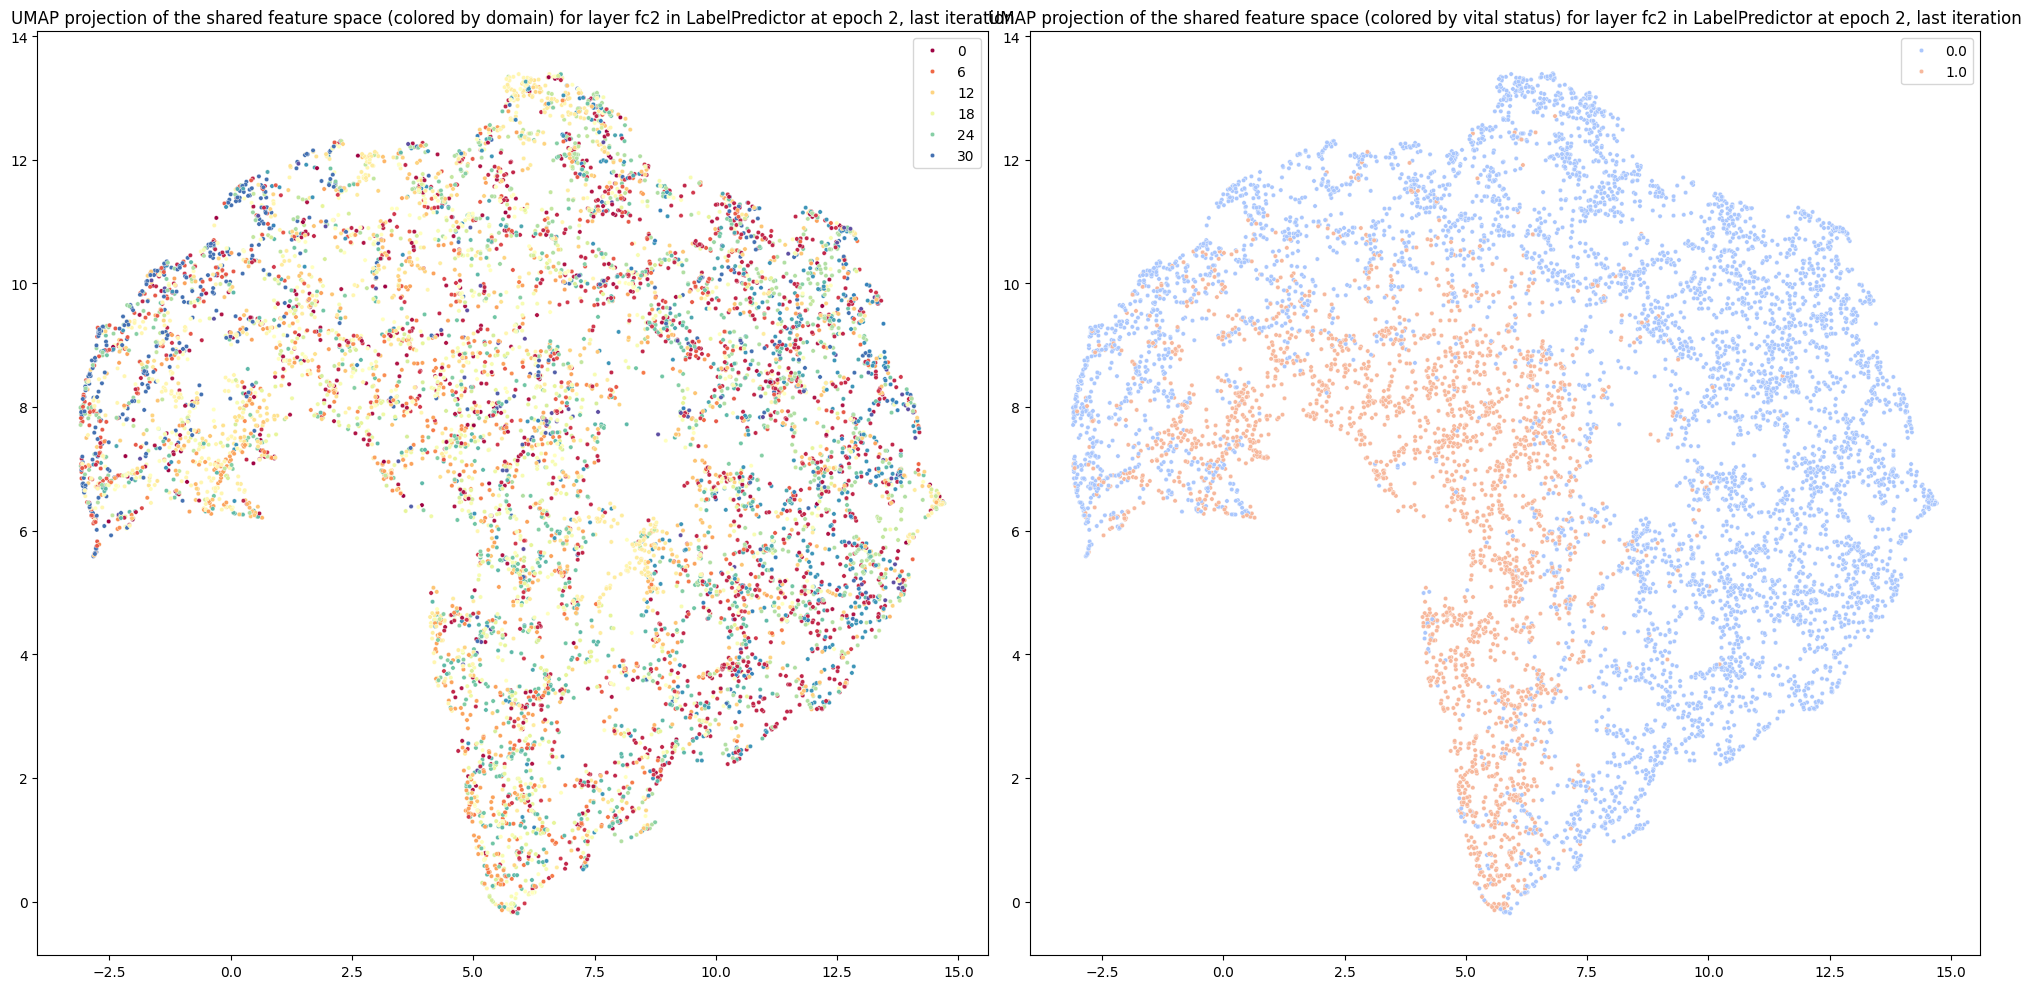

In [23]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


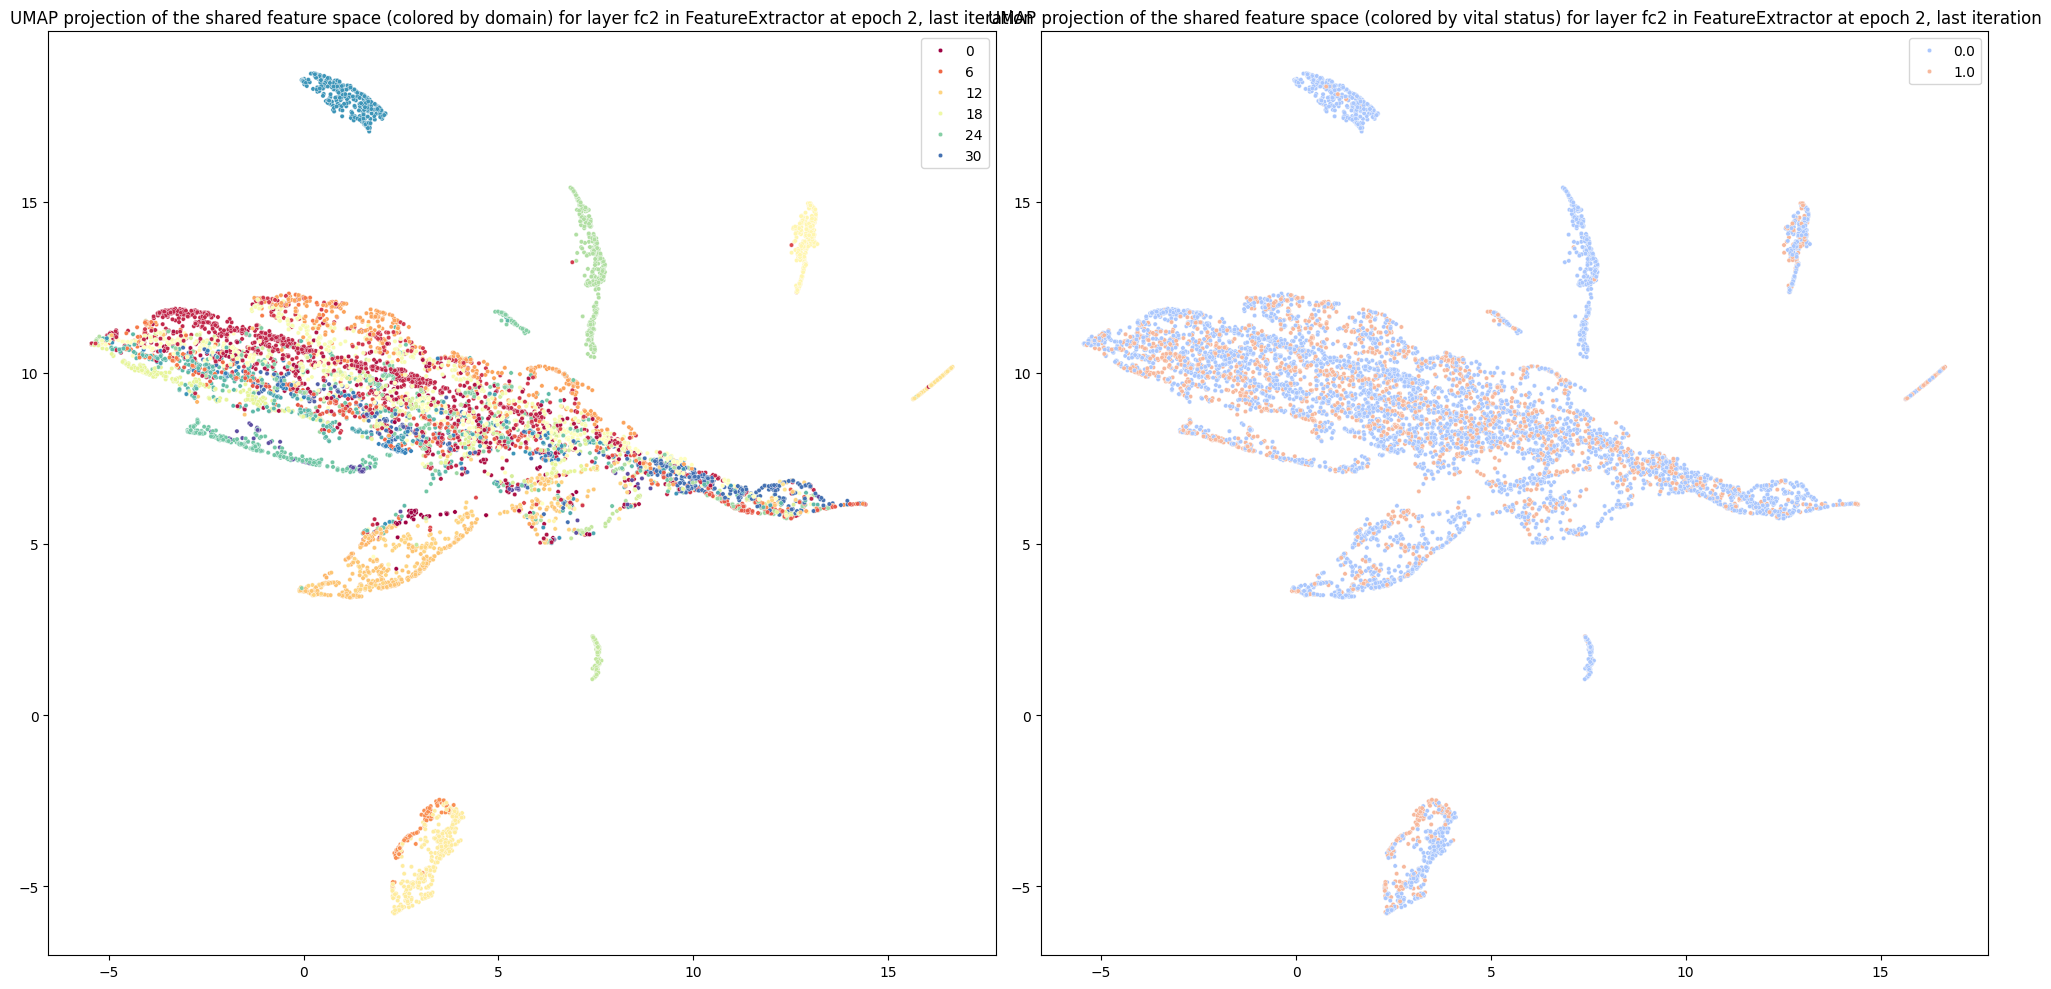

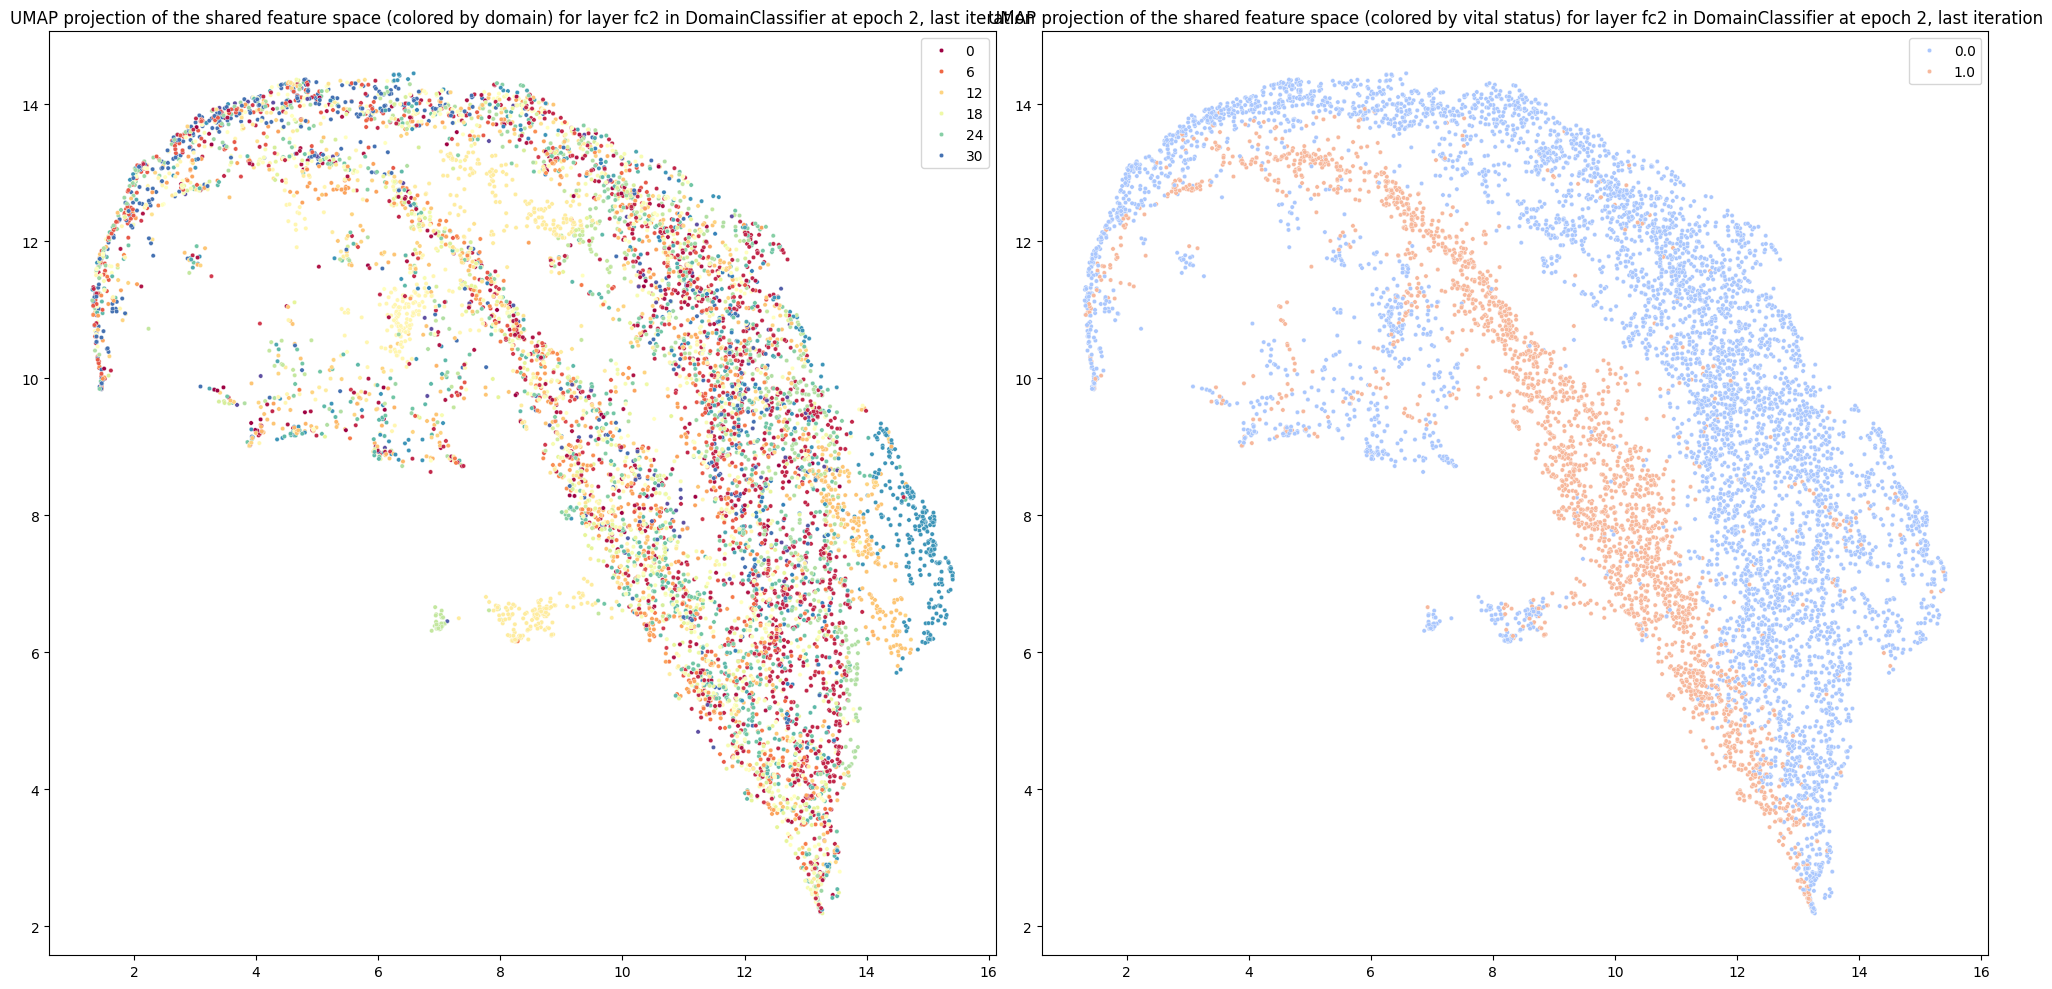

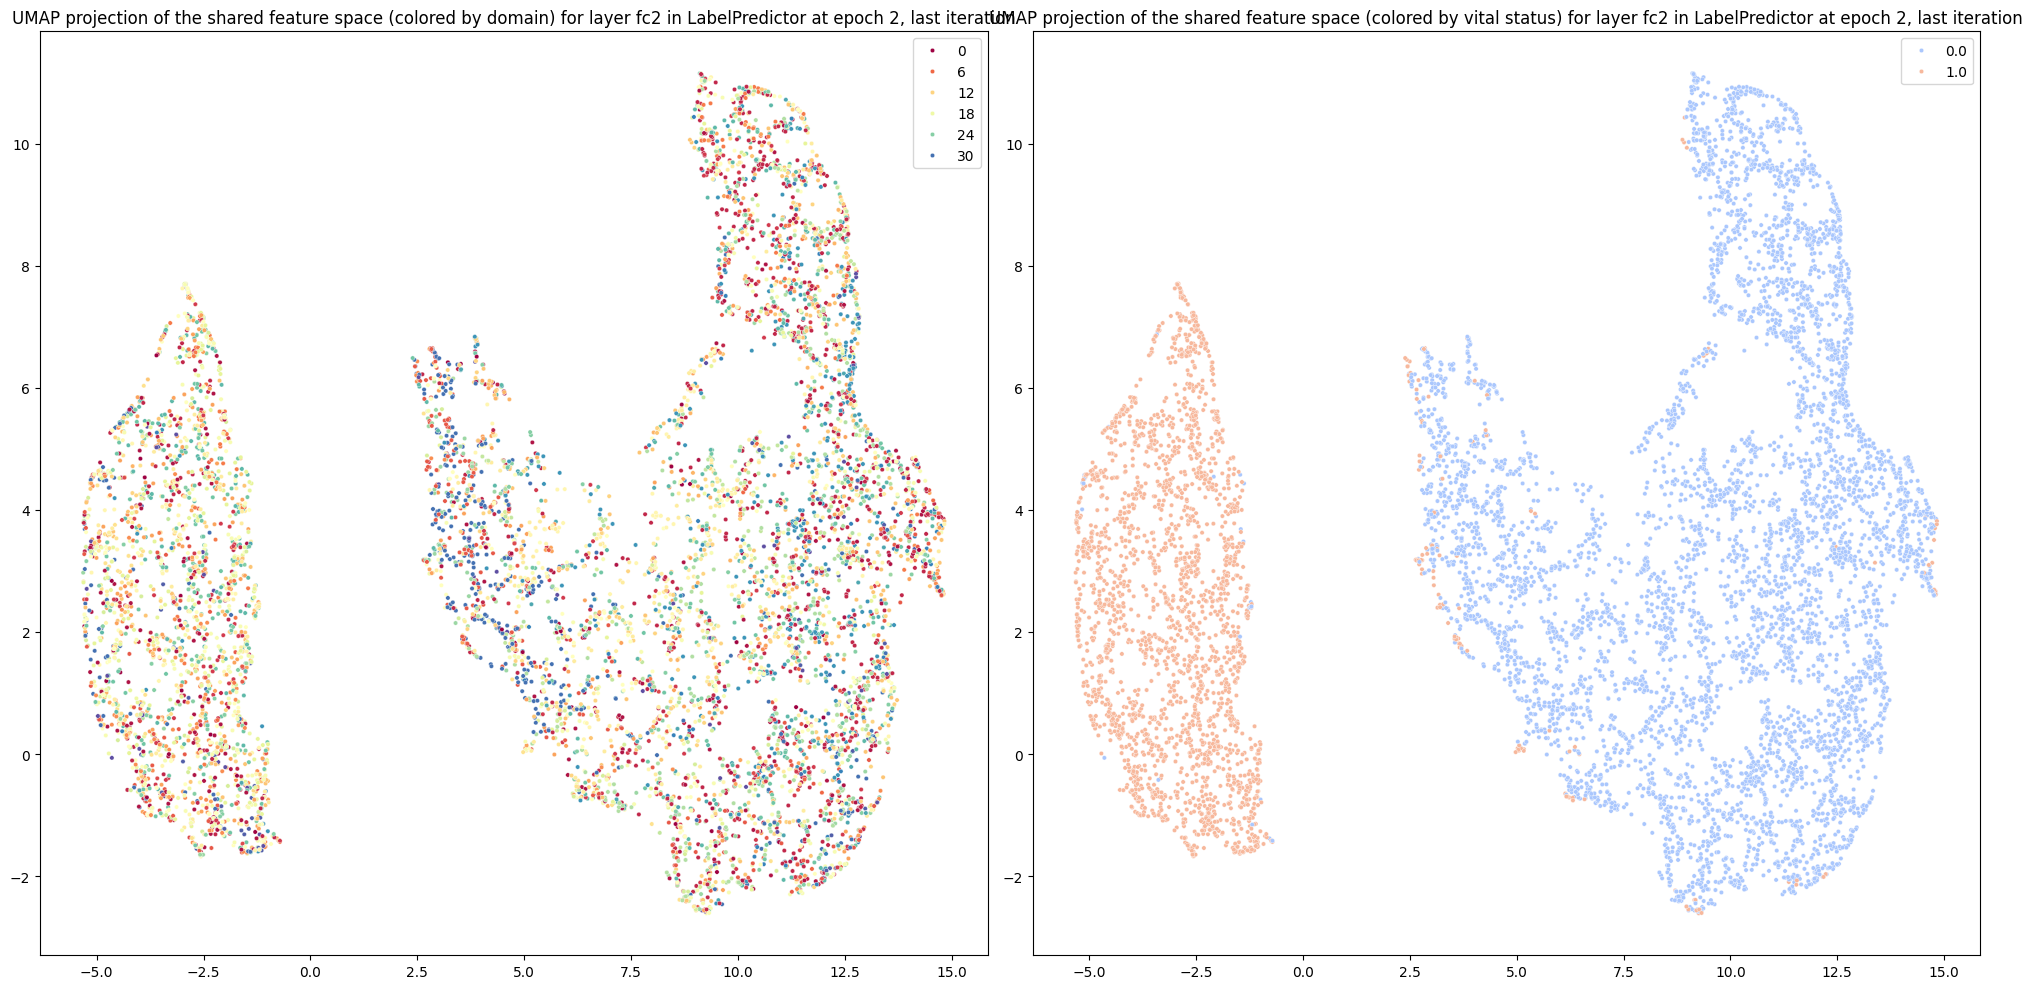

In [24]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=29, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=29, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=29, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


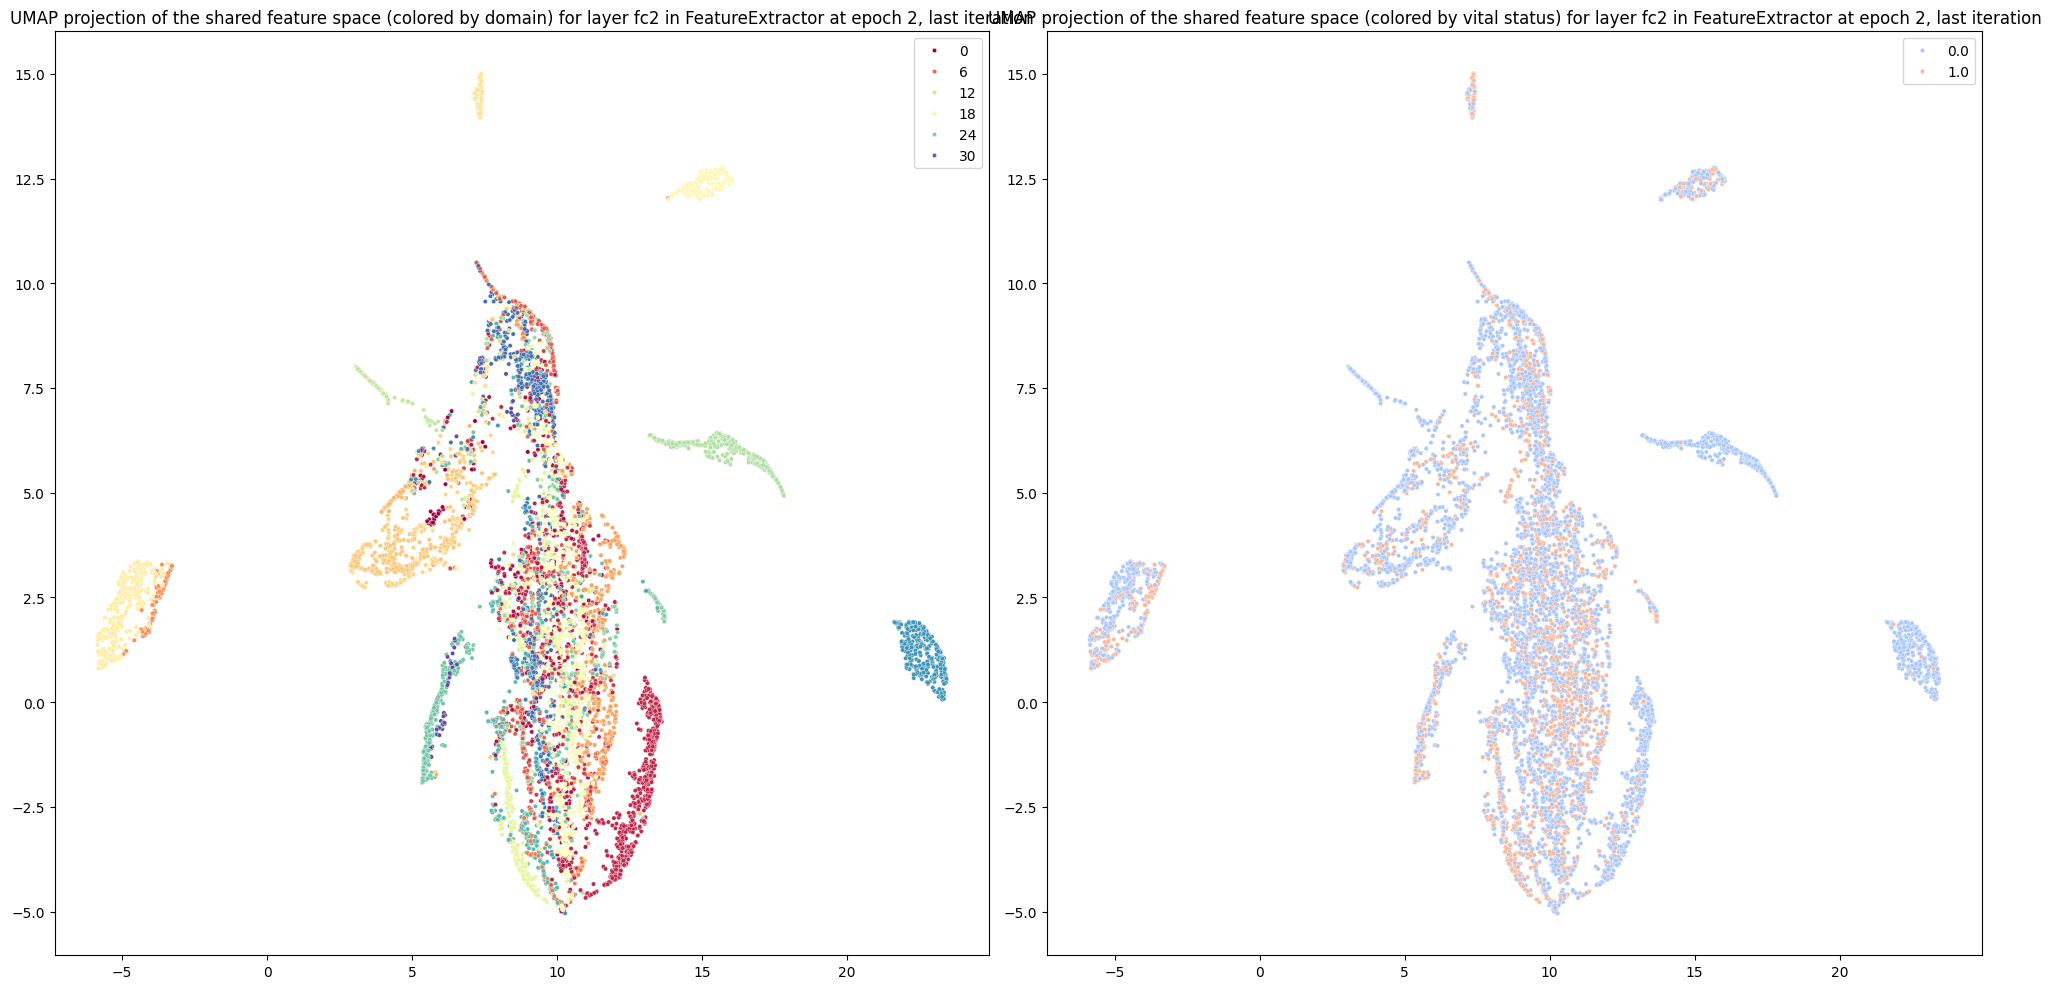

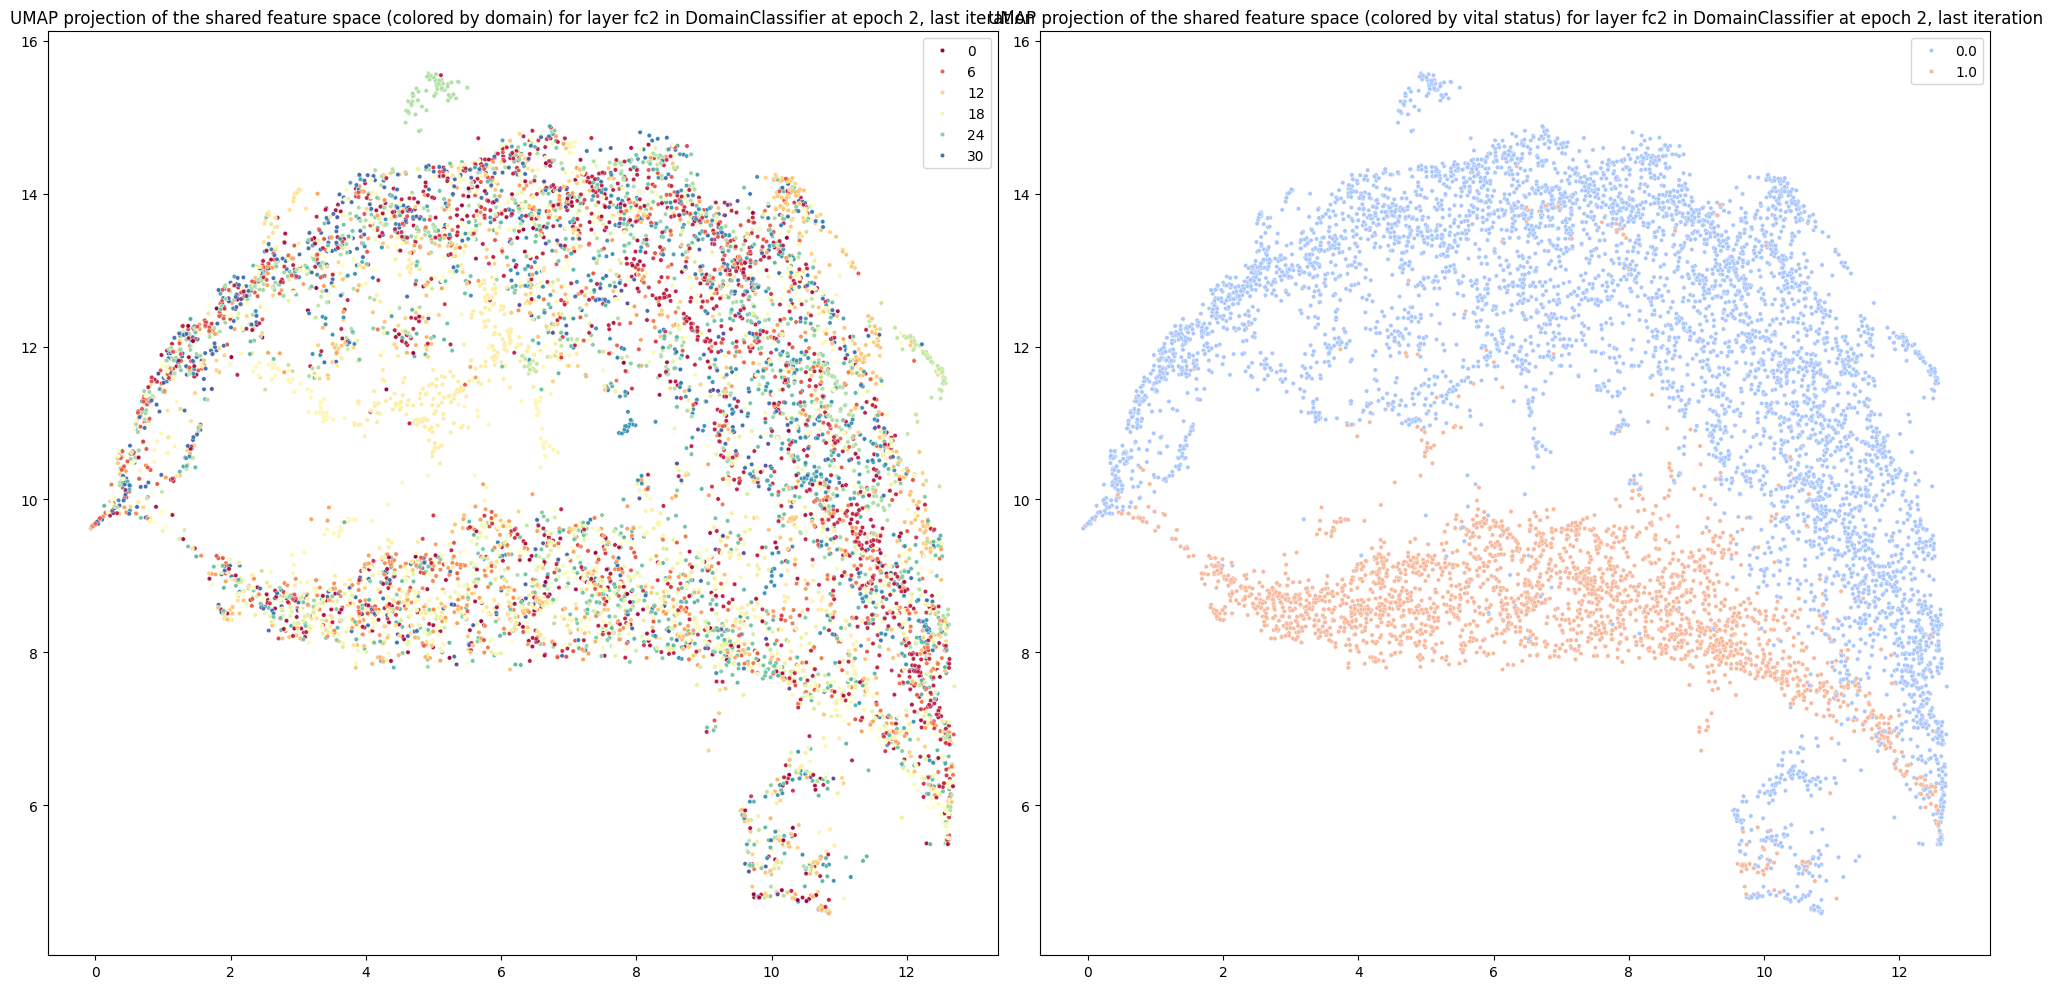

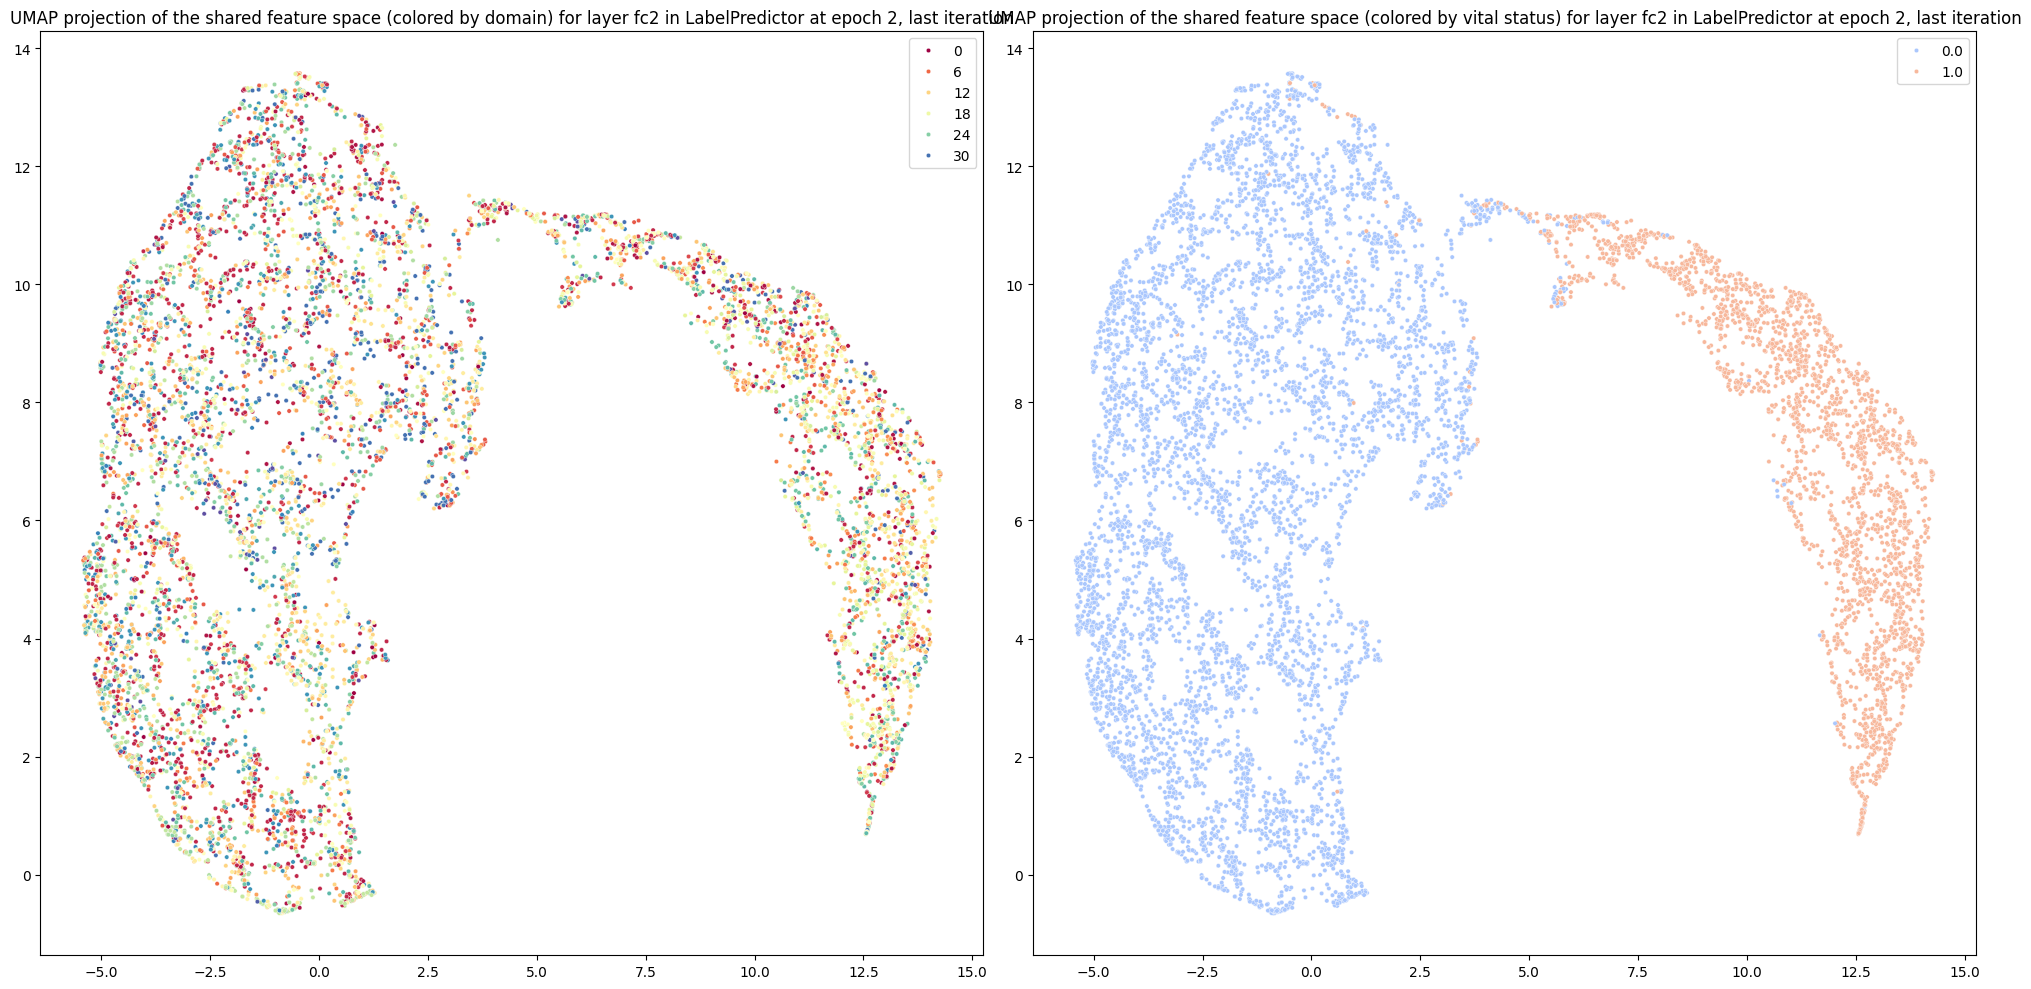

In [26]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch= 49, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=49, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=49, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')

In [ ]:
# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 5 es epoch 4

# Obtener el modelo guardado al final de la época 5
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)


In [27]:
import torch
import shap
from tqdm import tqdm
import numpy as np

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 29  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 10
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Convertir los datos de miRNAs a un tensor, pero solo las primeras 100 muestras
X = df.iloc[:, :-2].values  # Usando las primeras 100 filas y todas las columnas excepto las dos últimas
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

# Asegúrate de que el modelo esté en modo de evaluación
model.eval()

# Crear un modelo combinado que incluya tanto el FeatureExtractor como el LabelPredictor
class CombinedModel(torch.nn.Module):
    def __init__(self, feature_extractor, label_predictor):
        super(CombinedModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.label_predictor = label_predictor

    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.label_predictor(features)
        return output

combined_model = CombinedModel(model.feature_extractor, model.label_predictor)

# Crear un objeto SHAP explainer utilizando GradientExplainer con el modelo combinado
explainer = shap.GradientExplainer(combined_model, X_tensor)

# Calcular los valores SHAP para la salida del LabelPredictor directamente sobre X_tensor
shap_values = []
try:
    for i in tqdm(range(X_tensor.shape[0]), desc="Calculando valores SHAP"):
        shap_value = explainer.shap_values(X_tensor[i:i+1])
        shap_values.append(shap_value)
        print(f"SHAP values for instance {i}: {shap_value}")

    # Convertir la lista de valores SHAP a un numpy array
    shap_values_np = np.vstack(shap_values).squeeze()  # Eliminar la tercera dimensión
    print("Final SHAP values numpy array (shape):", shap_values_np.shape)

    # Usar los nombres de características originales
    feature_names_original = df.iloc[:, :-2].columns

    # Visualización de los valores SHAP para las características originales
    print("Generating SHAP summary plot...")
    shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)
    print("SHAP summary plot generated successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
    print(f"SHAP values calculated so far: {shap_values}")


Modelo guardado al final de la época 30, iteración 65


Calculando valores SHAP:   0%|          | 1/10286 [00:00<44:00,  3.90it/s]

SHAP values for instance 0: [[[ 1.52840765e-07]
  [ 3.81076928e-05]
  [-1.73892933e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.34141759e-09]]]


Calculando valores SHAP:   0%|          | 2/10286 [00:00<38:30,  4.45it/s]

SHAP values for instance 1: [[[ 5.33252091e-08]
  [-2.42137147e-07]
  [-5.21430724e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.11721060e-08]]]


Calculando valores SHAP:   0%|          | 3/10286 [00:00<36:50,  4.65it/s]

SHAP values for instance 2: [[[ 3.58724928e-07]
  [-1.68948860e-05]
  [ 2.86762403e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.51171604e-08]]]


Calculando valores SHAP:   0%|          | 5/10286 [00:01<35:22,  4.84it/s]

SHAP values for instance 3: [[[ 4.20693865e-08]
  [-1.22876493e-07]
  [-1.03178203e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.77090676e-08]]]
SHAP values for instance 4: [[[-1.61090722e-07]
  [-1.59581530e-06]
  [-1.76100622e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.75504564e-07]]]


Calculando valores SHAP:   0%|          | 7/10286 [00:01<34:42,  4.94it/s]

SHAP values for instance 5: [[[-1.32651644e-07]
  [-1.28378776e-06]
  [-6.84022666e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.99294154e-07]]]
SHAP values for instance 6: [[[ 8.60148423e-08]
  [-2.15842021e-07]
  [-4.99318222e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.08189482e-07]]]


Calculando valores SHAP:   0%|          | 8/10286 [00:01<34:51,  4.91it/s]

SHAP values for instance 7: [[[ 1.61193157e-07]
  [-2.79485239e-06]
  [ 1.25356302e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07383933e-06]]]


Calculando valores SHAP:   0%|          | 10/10286 [00:02<34:40,  4.94it/s]

SHAP values for instance 8: [[[ 7.20564446e-08]
  [ 8.31102097e-08]
  [ 6.60070867e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.84139629e-07]]]
SHAP values for instance 9: [[[ 8.67538154e-07]
  [-1.41125662e-06]
  [-4.17396773e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.73013375e-06]]]


Calculando valores SHAP:   0%|          | 11/10286 [00:02<34:28,  4.97it/s]

SHAP values for instance 10: [[[1.22405244e-08]
  [2.65468941e-06]
  [1.55795712e-05]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [2.47091719e-07]]]


Calculando valores SHAP:   0%|          | 13/10286 [00:02<34:29,  4.96it/s]

SHAP values for instance 11: [[[ 1.86331855e-07]
  [ 1.13548283e-06]
  [ 3.28994730e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30636585e-06]]]
SHAP values for instance 12: [[[-3.21401153e-07]
  [ 7.69189971e-06]
  [ 6.78581529e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.74406198e-06]]]


Calculando valores SHAP:   0%|          | 15/10286 [00:03<34:24,  4.98it/s]

SHAP values for instance 13: [[[ 1.43883208e-07]
  [ 2.00379683e-07]
  [-2.82478509e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.37156862e-07]]]
SHAP values for instance 14: [[[ 4.39830873e-09]
  [-1.68237719e-07]
  [ 5.64175103e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.29252104e-07]]]


Calculando valores SHAP:   0%|          | 16/10286 [00:03<34:28,  4.96it/s]

SHAP values for instance 15: [[[-1.09281231e-07]
  [ 6.67971578e-08]
  [-2.56030334e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.36903826e-08]]]


Calculando valores SHAP:   0%|          | 17/10286 [00:03<34:38,  4.94it/s]

SHAP values for instance 16: [[[ 6.94702485e-08]
  [-3.83164006e-06]
  [ 1.63843084e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34442751e-07]]]


Calculando valores SHAP:   0%|          | 18/10286 [00:03<34:38,  4.94it/s]

SHAP values for instance 17: [[[-2.39478218e-07]
  [-6.55876812e-07]
  [-2.47141744e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.39075233e-06]]]


Calculando valores SHAP:   0%|          | 20/10286 [00:04<34:26,  4.97it/s]

SHAP values for instance 18: [[[-6.63753027e-07]
  [ 1.81481677e-06]
  [ 1.71454149e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22084897e-06]]]
SHAP values for instance 19: [[[ 2.65127717e-07]
  [-4.58268860e-07]
  [-1.85598559e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.23389136e-06]]]


Calculando valores SHAP:   0%|          | 21/10286 [00:04<34:28,  4.96it/s]

SHAP values for instance 20: [[[-2.98443317e-07]
  [ 7.13766287e-07]
  [ 3.03733120e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.89372327e-07]]]


Calculando valores SHAP:   0%|          | 23/10286 [00:04<34:33,  4.95it/s]

SHAP values for instance 21: [[[ 2.14828763e-08]
  [ 1.11736749e-06]
  [ 3.11614768e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78458021e-07]]]
SHAP values for instance 22: [[[-4.39349909e-08]
  [-9.53085976e-08]
  [ 1.14194917e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16015480e-06]]]


Calculando valores SHAP:   0%|          | 25/10286 [00:05<34:13,  5.00it/s]

SHAP values for instance 23: [[[ 3.76717673e-08]
  [ 3.02777659e-07]
  [ 6.20331483e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.23014996e-07]]]
SHAP values for instance 24: [[[ 2.23068601e-07]
  [-4.74725549e-07]
  [-1.86384403e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.49085801e-07]]]


Calculando valores SHAP:   0%|          | 27/10286 [00:05<34:16,  4.99it/s]

SHAP values for instance 25: [[[-9.56969075e-07]
  [ 6.47062255e-05]
  [ 2.85691977e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.44854042e-06]]]
SHAP values for instance 26: [[[ 1.45077292e-08]
  [ 1.52849476e-07]
  [ 5.58278246e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40681574e-07]]]


Calculando valores SHAP:   0%|          | 28/10286 [00:05<35:04,  4.87it/s]

SHAP values for instance 27: [[[ 9.09016777e-08]
  [ 2.48346111e-06]
  [ 9.10647253e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.94161042e-07]]]


KeyboardInterrupt: 

In [ ]:
shap_values_np.shape

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Definir el número de pliegues
n_splits = 10  # Número de pliegues para la validación cruzada
skf = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar resultados de AUC
auc_scores = []
fpr_list = []
tpr_list = []

# Validación cruzada estratificada
for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1).to(device)

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        label_preds, _, _ = model(X_test_tensor)
        label_preds = label_preds.cpu().numpy()
        Y_test = Y_test_tensor.cpu().numpy()

    # Calcular el AUC
    auc_score = roc_auc_score(Y_test, label_preds)
    auc_scores.append(auc_score)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, label_preds)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    print(f"AUC for fold {fold + 1}: {auc_score:.4f}")

# Promediar y graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_splits):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Label Predictor across Folds')
plt.legend(loc="lower right")
plt.show()


In [ ]:
df

In [ ]:
pd.DataFrame(shap_values_np, columns=feature_names_original,index= df.index)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt


# Create the DataFrame with SHAP values
df_shap_values = pd.DataFrame(shap_values_np, columns=feature_names_original,index= df.index)

# Scaling the SHAP values using Z-score (StandardScaler)
scaler = StandardScaler()
scaled_shap_values = scaler.fit_transform(df_shap_values)

# Applying PCA to reduce to 30 dimensions
pca = PCA(n_components=30)
pca_shap_values = pca.fit_transform(scaled_shap_values)

# Applying UMAP after PCA
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(pca_shap_values)

# Convert the UMAP embedding to a DataFrame for easy plotting
df_umap = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'], index=df.index)

# Plotting the UMAP projection after PCA
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c='blue', s=10)
plt.title('UMAP projection of SHAP values after PCA')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

# Display the resulting UMAP dataframe
print(df_umap)


In [ ]:
# Plotting the UMAP projection with color based on vital status
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=Y, cmap='coolwarm', s=0.1)
plt.title('UMAP projection of SHAP values after PCA (colored by vital status)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Vital Status (0=Dead, 1=Alive)')
plt.grid(True)
plt.show()



In [ ]:
# Automatically convert text labels in 'panels' to numeric values using LabelEncoder
label_encoder_panel = LabelEncoder()
panels_numeric = label_encoder_panel.fit_transform(panels)

# Plotting the UMAP projection with color based on panel labels
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=panels_numeric, s=10)
plt.title('UMAP projection of SHAP values after PCA (colored by panels)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Panel (Encoded)')
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Compute the absolute SHAP values
absolute_shap_values = df_shap_values.abs()

# Step 2: Sum the SHAP values across all samples (for each feature)
feature_importance = absolute_shap_values.sum(axis=0)

# Step 3: Select the top 100 most important features
top_100_features = feature_importance.nlargest(50).index

# Step 4: Filter the original SHAP matrix to keep only the top 100 features
shap_top_100 = df_shap_values[top_100_features]

In [ ]:
shap_top_100

In [ ]:
# Scaling the SHAP values using Z-score (StandardScaler)
scaler = StandardScaler()
scaled_shap_values = scaler.fit_transform(shap_top_100)

# Applying PCA to reduce to 30 dimensions
pca = PCA(n_components=30)
pca_shap_values = pca.fit_transform(shap_top_100)

# Applying UMAP after PCA
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(pca_shap_values)

# Convert the UMAP embedding to a DataFrame for easy plotting
df_umap = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'], index=df.index)

# Plotting the UMAP projection after PCA
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c='blue', s=10)
plt.title('UMAP projection of SHAP values after PCA')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

# Display the resulting UMAP dataframe
print(df_umap)


In [ ]:
# Automatically convert text labels in 'panels' to numeric values using LabelEncoder
label_encoder_panel = LabelEncoder()
panels_numeric = label_encoder_panel.fit_transform(panels)

# Plotting the UMAP projection with color based on panel labels
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=panels_numeric, s=10)
plt.title('UMAP projection of SHAP values after PCA (colored by panels)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Panel (Encoded)')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Automatically convert text labels in 'panels' to numeric values using LabelEncoder
label_encoder_panel = LabelEncoder()
panels_numeric = label_encoder_panel.fit_transform(panels)

# Create a DataFrame for the UMAP results to use in Seaborn
df_umap['Panel'] = panels  # Add the panel labels to the UMAP DataFrame

# Define a discrete color palette that can handle up to 32 categories
palette = sns.color_palette("tab20", n_colors=32)  # "tab20" gives a discrete color palette

# Plotting the UMAP projection with Seaborn's scatterplot, coloring based on panels
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='UMAP_1',
    y='UMAP_2',
    hue='Panel',
    data=df_umap,
    palette=palette,
    s=60,
    legend='full'
)

plt.title('UMAP projection of SHAP values after PCA (colored by panels)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)

# Adjust the legend to make it more readable
plt.legend(title='Panels', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize='small')
plt.tight_layout()
plt.show()


In [ ]:
# Plotting the UMAP projection with color based on vital status
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=Y, cmap='coolwarm', s=1)
plt.title('UMAP projection of SHAP values after PCA (colored by vital status)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Vital Status (0=Dead, 1=Alive)')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Automatically convert text labels in 'panels' to numeric values using LabelEncoder
label_encoder_panel = LabelEncoder()
panels_numeric = label_encoder_panel.fit_transform(panels)

# Create a DataFrame for the UMAP results to use in Seaborn
df_umap['vital'] = Y  # Add the panel labels to the UMAP DataFrame

# Define a discrete color palette that can handle up to 32 categories
palette = sns.color_palette("tab20", n_colors=32)  # "tab20" gives a discrete color palette

# Plotting the UMAP projection with Seaborn's scatterplot, coloring based on panels
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='UMAP_1',
    y='UMAP_2',
    hue='Panel',
    data=df_umap,
    palette=palette,
    s=60,
    legend='full'
)

plt.title('UMAP projection of SHAP values after PCA (colored by vital)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)

# Adjust the legend to make it more readable
plt.legend(title='vital', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize='small')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Automatically convert text labels in 'panels' to numeric values using LabelEncoder
label_encoder_panel = LabelEncoder()
panels_numeric = label_encoder_panel.fit_transform(panels)

# Create a DataFrame for the UMAP results and add the panel labels
df_umap['Panel'] = panels  # Add the panel labels to the UMAP DataFrame

# Create a Plotly scatter plot
fig = px.scatter(
    df_umap,
    x='UMAP_1',
    y='UMAP_2',
    color='Panel',  # Categorical color based on 'Panel'
    title='UMAP projection of SHAP values after PCA (colored by panels)',
    labels={
        'UMAP_1': 'UMAP 1',
        'UMAP_2': 'UMAP 2',
        'Panel': 'Panels'
    },
    color_discrete_sequence=px.colors.qualitative.Set3,  # Set discrete color palette
    template='plotly_white'  # Choose a clean template
)

# Adjust legend layout and plot size
fig.update_layout(
    width=900,
    height=600,
    legend_title_text='Panels',
    legend=dict(
        orientation="v",  # vertical legend
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.05  # Move the legend outside of the plot
    )
)

# Show the plot
fig.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming df_umap contains the UMAP projection data and 'VIM' contains the values to color by
df_umap['VIM'] = np.log(df['VIM']  +1) # Add the 'VIM' column to the UMAP DataFrame

# Plotting the UMAP projection with color based on 'VIM' values
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=df_umap['VIM'], cmap='viridis', s=10)
plt.title('UMAP projection with VIM values as color')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='VIM Value')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming df_umap contains the UMAP projection data and 'VIM' contains the values to color by
df_umap['FN1'] = np.log(df['FN1']  +1) # Add the 'VIM' column to the UMAP DataFrame

# Plotting the UMAP projection with color based on 'VIM' values
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=df_umap['FN1'], cmap='viridis', s=10)
plt.title('UMAP projection with VIM values as color')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='VIM Value')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming df_umap contains the UMAP projection data and 'VIM' contains the values to color by
df_umap['MT-CO3'] = np.log(df['MT-CO3']  +1) # Add the 'VIM' column to the UMAP DataFrame

# Plotting the UMAP projection with color based on 'VIM' values
plt.figure(figsize=(10, 6))
plt.scatter(df_umap['UMAP_1'], df_umap['UMAP_2'], c=df_umap['MT-CO3'], cmap='viridis', s=10)
plt.title('UMAP projection with VIM values as color')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='MT-CO3 Value')
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Compute the absolute SHAP values
absolute_shap_values = df_shap_values.abs()

# Step 2: Sum the SHAP values across all samples (for each feature)
feature_importance = absolute_shap_values.sum(axis=0)

# Step 3: Select the top 100 most important features
top_100_features = feature_importance.nlargest(300).index

# Step 4: Filter the original SHAP matrix to keep only the top 100 features
shap_top_100 = df_shap_values[top_100_features]



# Step 1: Compute the absolute SHAP values
absolute_shap_values = shap_top_100.abs()

# Step 2: Sum the SHAP values across all samples (for each gene)
gene_importance = absolute_shap_values.sum(axis=0)

# Step 3: Sort the genes by importance
gene_importance_sorted = gene_importance.sort_values(ascending=False)

# Step 4: Plotting the bar plot for SHAP values
plt.figure(figsize=(12, 38))
sns.barplot(x=gene_importance_sorted.values, y=gene_importance_sorted.index, palette='viridis')

# Add title and labels
plt.title('Gene Importance Based on SHAP Values', fontsize=16)
plt.xlabel('Summed Absolute SHAP Values', fontsize=12)
plt.ylabel('Genes', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
THCA PRAD LAML LIHC

**Analysis of the Model Outputs:**

The result you obtained confirms that the wrapper (`ModelWrapper`) is functioning correctly to return only the first output of the model, which corresponds to the vital status prediction. Below is the analysis of the results:

1. **Outputs of the model without the wrapper:**
   - **First output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the vital status prediction (`LabelPredictor`).
   - **Second output:** `tensor([[-0.2760,  0.1515, ...]], device='cuda:0')` with dimension `[10286, 33]` corresponds to the domain prediction (`DomainClassifier`).
   - **Third output:** `tensor([[ 2.3175e-01, ...]], device='cuda:0')` with dimension `[10286, 5000]` corresponds to some intermediate representation or features from the feature extractor (`FeatureExtractor`).

2. **Output of the model with the wrapper:**
   - **Output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the first output of the model, which is the vital status prediction, as expected.

**Conclusion:**

The wrapper `ModelWrapper` is functioning as intended, returning only the first output of the full model, which is the vital status prediction. This is confirmed by comparing the dimensions:

- **Dimensions of all outputs:**
  - **First output:** `[10286, 1]`
  - **Second output:** `[10286, 33]`
  - **Third output:** `[10286, 5000]`

- **Dimension of the wrapped output:**
  - `[10286, 1]`

The dimension `[10286, 1]` of the wrapped output matches the dimension of the vital status prediction, confirming that the wrapper is correctly returning the first output.

This behavior ensures that when you calculate SHAP values using the wrapper, you are calculating SHAP values with respect to the vital status prediction (and not the other outputs of the model). This is exactly what you need to analyze how the input features influence the vital status prediction in your DANN model.




In [ ]:
asdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
print(X_tensor.shape)

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Obtener la salida del modelo
output = model(X_tensor)

# Si el modelo devuelve una tupla, selecciona la primera salida
if isinstance(output, tuple):
    output = output[0]

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(model, X_tensor)
shap_values = explainer.shap_values(X_tensor)
print(shap_values.shape)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Paso 1: Crear un objeto DeepExplainer para el modelo
explainer = shap.DeepExplainer(model.label_predictor, X_tensor)

# Paso 2: Calcular los valores SHAP utilizando el tensor de entrada X_tensor
shap_values = explainer.shap_values(X_tensor)

# Paso 3: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Verificar las salidas del modelo sin el wrapper
with torch.no_grad():
    all_outputs = model(X_tensor)
    print("Salidas del modelo (sin wrapper):", all_outputs)
    print("Dimensiones de todas las salidas:", [output.shape for output in all_outputs])

# Crear una clase wrapper para el modelo
# Esta clase `ModelWrapper` envuelve el modelo completo, pero en la función `forward`
# devuelve solo la primera salida del modelo (que corresponde a la predicción del estado vital).
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida (la predicción de la etiqueta de vitalidad)

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Verificar la salida del modelo con el wrapper
with torch.no_grad():
    wrapped_output = wrapped_model(X_tensor)
    print("Salida del modelo (con wrapper):", wrapped_output)
    print("Dimensión de la salida envuelta:", wrapped_output.shape)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.DeepExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)



In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor,batch_size = 150)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
sdasdasdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch

# Asumiendo que el modelo DANN ya ha sido definido y entrenado

# Instanciar y cargar el modelo como se hace en el código original
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
model = DANN(input_dim, num_domains).to(device)

# Cargar el modelo guardado al final de una época en particular
epoch_of_interest = 9  # Ejemplo, puedes ajustar la época de interés
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
model.load_state_dict(model_state_dict)

# Asegurarse de que el modelo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para obtener solo la salida del LabelPredictor
class LabelPredictorWrapper(torch.nn.Module):
    def __init__(self, model):
        super(LabelPredictorWrapper, self).__init__()
        self.label_predictor = model.label_predictor

    def forward(self, x):
        return self.label_predictor(x)

# Instanciar el wrapper
label_predictor_model = LabelPredictorWrapper(model)

# Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(label_predictor_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Visualización de SHAP
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:

# Paso 2: Usar GradientExplainer para calcular los valores SHAP
explainer = shap.GradientExplainer(label_predictor_model,X)
shap_values = explainer.shap_values(X)

# Paso 3: Convertir los tensores de entrada y los valores SHAP a numpy para visualización
features_np = X.cpu().numpy()
shap_values_np = np.array(shap_values).squeeze()

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns)

In [ ]:
features_np.shape

In [ ]:
len(df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns,max_display=50 )


In [ ]:
shap_values_np.shape

In [ ]:

pd.DataFrame(shap_values_np, columns=df.iloc[:, :-2].columns,index=df.index)